Author: Nedal Mohammad

# Project Description

This dataset is comprised of images of plant seedlings at various stages of growth. The dataset contains 12 unique species. The goal of the project is to create a classifier capable of determining a plant's species. The ability to do so effectively can mean better crop yields and better stewardship of the environment. 

To accomplish this goal a Convolutional Neural Network (CNN) will be used. The Number of training images was minimal so Data Augmentation was employed to produce a large training set. The concepts of transfer learning were also employed using the VGG16 model as a starting point.

We can start by importing libraries:

In [35]:
#Reading the training images from the path and labelling them into the given categories
import numpy as np
import pandas as pd
from matplotlib import rc
import matplotlib.pyplot as plt
!pip install opencv-contrib-python
import cv2
import seaborn as sns # for data visualization 
import matplotlib
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
import random as random

#### Deep learning modules/ packages 
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential #sequential api for sequential model 
from tensorflow.keras.layers import Dense, Dropout, Flatten #importing different layers 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Activation, Input, LeakyReLU,Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical #to perform one-hot encoding 
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam #optimiers for optimizing the model
from keras.callbacks import EarlyStopping  #regularization method to prevent the overfitting
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import losses, optimizers
from keras.preprocessing.image import ImageDataGenerator #for generating additional training images

# Reading the Data

* We would like to read the images into X and the labels into Y

In [2]:
X=np.load(r'C:\Users\nedal\OneDrive\Desktop\PGP AI ML\Project 8 - Computer Vision\images (2).npy')

In [3]:
Y=np.loadtxt(r'C:\Users\nedal\OneDrive\Desktop\PGP AI ML\Project 8 - Computer Vision\Labels (1).csv', dtype=str, delimiter='##')

After importing the images and the labels seperately, we would like to combine them somehow so we can shuffle them. 

data [] represents the total data of plant species and image of the plant

plant_species_data [] is the same as data but contains all of the images of each species

plant_species_img []  is a set of all images of a specific plant species

Let's build the arrays now, The below function is for preparing the data in the above format:

In [4]:
DATADIR = r"/Users/nedal/OneDrive/Desktop/PGP AI ML/Project 8 - Computer Vision"
CATEGORIES = ["Small-flowered Cranesbill","Fat Hen","Shepherds Purse","Common wheat","Common Chickweed","Charlock","Cleavers","Scentless Mayweed","Sugar beet","Maize","Black-grass","Loose Silky-bent"]
#The order of categories must be consistent with the data. They must be grouped in such a way:
#### every unique value in labels file is grouped and each group of the different labels occurs in an order --- 
#### That order is the order the categories must be in this list
#Those are the stipulations for this function to work.


#Storing all images/labels here
data = [] 

#This will be class specific and contain the img array as well as the class
Small_flowered_Cranesbill_data = []
Fat_Hen_data = []
Shepherds_Purse_data = []
Common_wheat_data = []
Common_Chickweed_data = []
Charlock_data = []
Cleavers_data = []
Scentless_Mayweed_data = []
Sugar_beet_data = []
Maize_data = []
Black_grass_data = []
Loose_Silky_bent_data = []

#These will also be class specific but only contain the img arrays
Small_flowered_Cranesbill_img = []
Fat_Hen_img = []
Shepherds_Purse_img = []
Common_wheat_img = []
Common_Chickweed_img = []
Charlock_img = []
Cleavers_img = []
Scentless_Mayweed_img = []
Sugar_beet_img = []
Maize_img = []
Black_grass_img = []
Loose_Silky_bent_img = []

def create_data():
    count=0
    i=1 # index offset: the 0th index in images matches the 1st index in labels
    for category in CATEGORIES: #take a unique category
        class_num = CATEGORIES.index(category) #assign a unique integer to represent the class
        
        for img in X: #begin looping through images
            if i == len(Y):
                break    # This break helps the code not have index out of bounds error out on the last index
            if category == Y[i]: #if the category selected matches the label at the corresponding index
                img_array = cv2.cvtColor(X[i-1], cv2.COLOR_RGB2GRAY) # Converting image to greyscale to reduce the complexity                                                      #and computation 
                
                data.append([img_array,class_num]) # append the image paired with the label
                #these if statements are class specific. only one will fire per class
                if class_num == 0:
                    Small_flowered_Cranesbill_data.append([img_array,class_num]) #append image and label
                    Small_flowered_Cranesbill_img.append([img_array]) #append only image (The arrays like this will
                                                                    #aid when indexing becomes layered
                elif class_num == 1:
                    Fat_Hen_data.append([img_array,class_num])
                    Fat_Hen_img.append([img_array])
                elif class_num == 2:
                    Shepherds_Purse_data.append([img_array,class_num])
                    Shepherds_Purse_img.append([img_array])
                elif class_num == 3:
                    Common_wheat_data.append([img_array,class_num])
                    Common_wheat_img.append([img_array])
                elif class_num == 4:
                    Common_Chickweed_data.append([img_array,class_num])
                    Common_Chickweed_img.append([img_array])
                elif class_num == 5:
                    Charlock_data.append([img_array,class_num])
                    Charlock_img.append([img_array])
                elif class_num == 6:
                    Cleavers_data.append([img_array,class_num])
                    Cleavers_img.append([img_array])
                elif class_num == 7:
                    Scentless_Mayweed_data.append([img_array,class_num])
                    Scentless_Mayweed_img.append([img_array])
                elif class_num == 8:
                    Sugar_beet_data.append([img_array,class_num])
                    Sugar_beet_img.append([img_array])
                elif class_num == 9:
                    Maize_data.append([img_array,class_num])
                    Maize_img.append([img_array])
                elif class_num == 10:
                    Black_grass_data.append([img_array,class_num])
                    Black_grass_img.append([img_array])
                elif class_num == 11:
                    Loose_Silky_bent_data.append([img_array,class_num])
                    Loose_Silky_bent_img.append([img_array])
                else:
                    pass #pick the next image
                i+=1
            else: # the label doesn't match the picture
                pass #pickthe next category
create_data()


Now that everything is matched to its label in one container we can shuffle the data and split it back into seperate X and y containers. Later we will split the data into training, validation, and test sets.

# Exploratory Data Analysis

In [5]:
# Separating the images and labels
X = [] #features will go here
y = [] #labels will go here
np.random.shuffle(data)
for features,label in data:
    X.append(features)
    y.append(label)
X= np.array(X)
print(X.shape)

(4750, 128, 128)


In total, we are provided with 4750 images. Each image is 128 pixels by 128 pixels.

In [6]:
#creating the dataframe to plot the pie chart
df=pd.DataFrame(y,columns=['Class'])

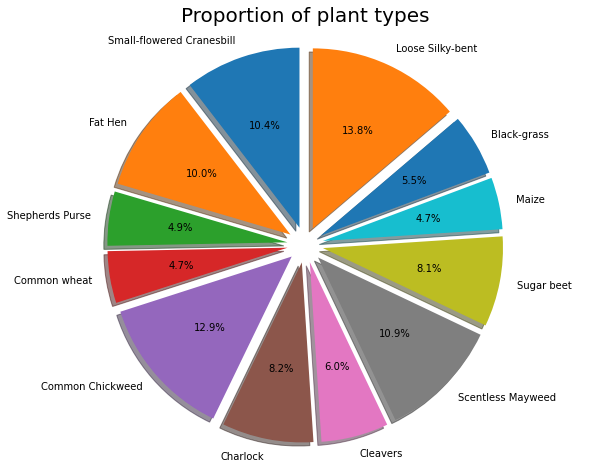

In [7]:
#plotting the pie chart 
labels = ["Small-flowered Cranesbill","Fat Hen","Shepherds Purse","Common wheat","Common Chickweed","Charlock","Cleavers","Scentless Mayweed","Sugar beet","Maize","Black-grass","Loose Silky-bent"]
sizes = [df.Class[df['Class']==0].count(), df.Class[df['Class']==1].count(), df.Class[df['Class']==2].count(), df.Class[df['Class']==3].count(), df.Class[df['Class']==4].count(), df.Class[df['Class']==5].count(), df.Class[df['Class']==6].count(), df.Class[df['Class']==7].count(), df.Class[df['Class']==8].count(), df.Class[df['Class']==9].count(), df.Class[df['Class']==10].count(), df.Class[df['Class']==11].count()]
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of plant types", size = 20)
plt.show()

We can see that some of the species are not as well represented as others. For example only 4.7% of the images belong to Common Wheat while Loose Silky-bent is represented by 13.8% of the images.

Let's view a sample of what each class looks like:

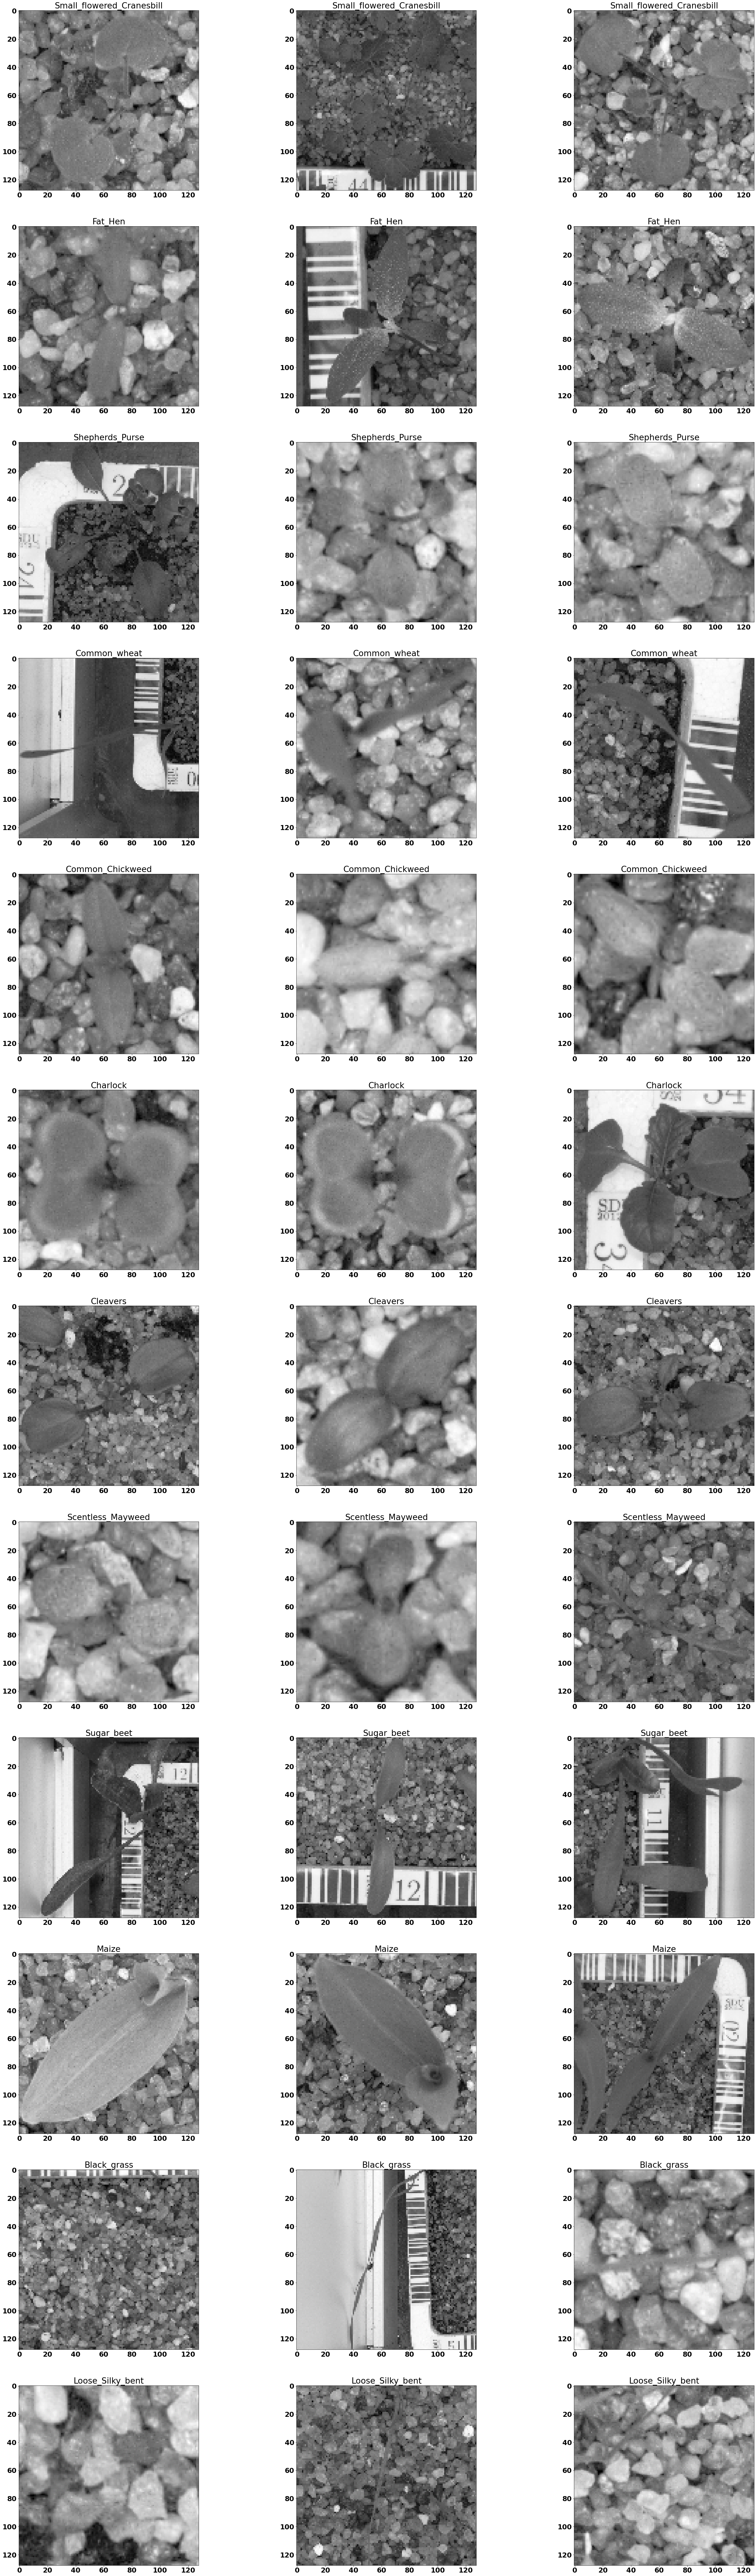

In [8]:
fig = plt.figure(figsize = (45,150))
font = {'weight' : 'bold',
        'size'   : 22}
# make the plot titles a bit easier to see
matplotlib.rc('font', **font)
grid_size=(12,3)
for i in range(36):
    if i < 3: #the first row of the sub plots
        plt.subplot2grid(grid_size,(0,i)) #place the figure in the first, second or third spot of this row depending on i
        label = 'Small_flowered_Cranesbill' #the label for every image on this row
        plt.imshow(Small_flowered_Cranesbill_data[random.randint(0,len(Small_flowered_Cranesbill_data))][0],cmap='Greys_r')
        #randomly select an image of the plant from the set of all images of the plant and display it in grayscale
        plt.title(label)
    if i >=3 and i<6: #the second row of subplots ... repeat all above steps.
        plt.subplot2grid(grid_size,(1,i-3))
        label = 'Fat_Hen'
        plt.imshow(Fat_Hen_data[random.randint(0,len(Fat_Hen_data))][0],cmap='Greys_r')
        plt.title(label)
    if i >=6 and i<9:
        plt.subplot2grid(grid_size,(2,i-6))
        label = 'Shepherds_Purse'
        plt.imshow(Shepherds_Purse_data[random.randint(0,len(Shepherds_Purse_data))][0],cmap='Greys_r')
        plt.title(label)
    if i >=9 and i<12:
        plt.subplot2grid(grid_size,(3,i-9))
        label = 'Common_wheat'
        plt.imshow(Common_wheat_data[random.randint(0,len(Common_wheat_data))][0],cmap='Greys_r')
        plt.title(label)
    if i >=12 and i<15:
        plt.subplot2grid(grid_size,(4,i-12))
        label = 'Common_Chickweed'
        plt.imshow(Common_Chickweed_data[random.randint(0,len(Common_Chickweed_data))][0],cmap='Greys_r')
        plt.title(label)
    if i >=15 and i<18:
        plt.subplot2grid(grid_size,(5,i-15))
        label = 'Charlock'
        plt.imshow(Charlock_data[random.randint(0,len(Charlock_data))][0],cmap='Greys_r')
        plt.title(label)
    if i >=18 and i<21:
        plt.subplot2grid(grid_size,(6,i-18))
        label = 'Cleavers'
        plt.imshow(Cleavers_data[random.randint(0,len(Cleavers_data))][0],cmap='Greys_r')
        plt.title(label)
    if i >=21 and i<24:
        plt.subplot2grid(grid_size,(7,i-21))
        label = 'Scentless_Mayweed'
        plt.imshow(Scentless_Mayweed_data[random.randint(0,len(Scentless_Mayweed_data))][0],cmap='Greys_r')
        plt.title(label)
    if i >=24 and i<27:
        plt.subplot2grid(grid_size,(8,i-24))
        label = 'Sugar_beet'
        plt.imshow(Sugar_beet_data[random.randint(0,len(Sugar_beet_data))][0],cmap='Greys_r')
        plt.title(label)
    if i >=27 and i<30:
        plt.subplot2grid(grid_size,(9,i-27))
        label = 'Maize'
        plt.imshow(Maize_data[random.randint(0,len(Maize_data))][0],cmap='Greys_r')
        plt.title(label)
    if i >=30 and i<33:
        plt.subplot2grid(grid_size,(10,i-30))
        label = 'Black_grass'
        plt.imshow(Black_grass_data[random.randint(0,len(Black_grass_data))][0],cmap='Greys_r')
        plt.title(label)
    if i >=33 and i<36:
        plt.subplot2grid(grid_size,(11,i-33))
        label = 'Loose_Silky_bent'
        plt.imshow(Loose_Silky_bent_data[random.randint(0,len(Loose_Silky_bent_data))][0],cmap='Greys_r')
        plt.title(label)
plt.show()

When visually comparing each species, a human eye could tell them apart if they were given an image of each species for comparison. So the hope is, that the computer will also be able to.


Let's take every image of a species and average them into one mean image to see if each species is distinguishable on the conglomerate level.

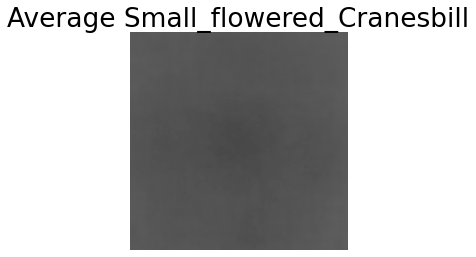

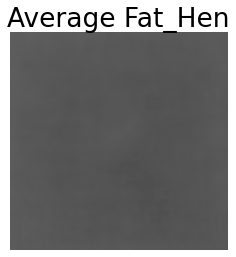

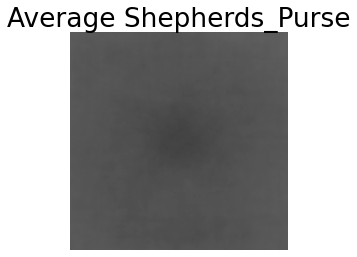

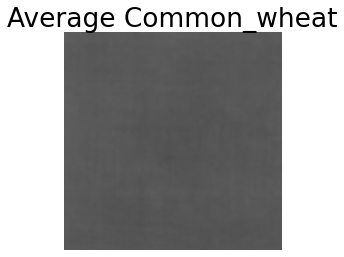

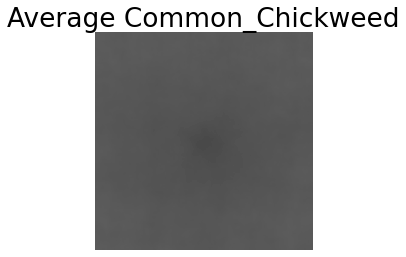

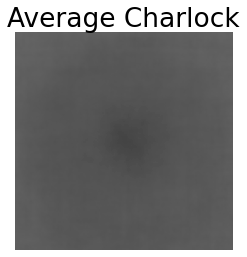

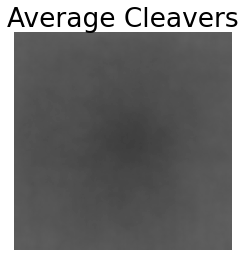

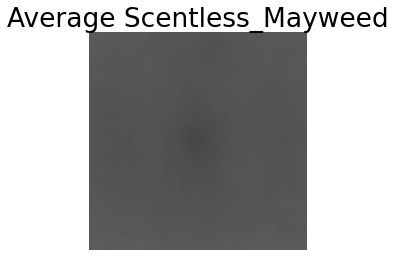

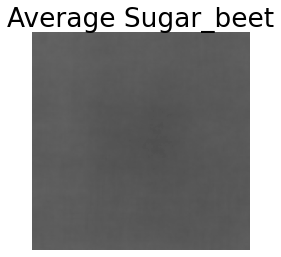

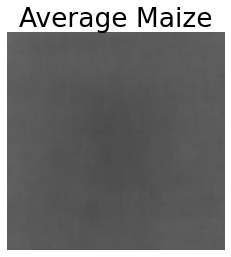

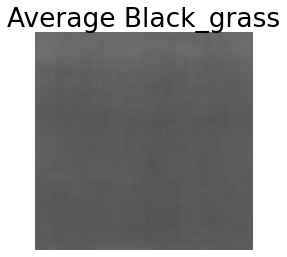

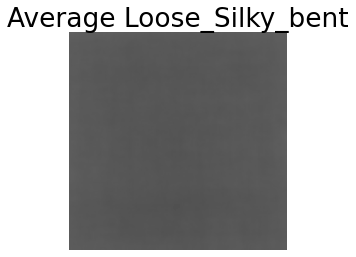

In [9]:
def find_mean_img(full_mat, title):
    # calculate the average
    mean_img = np.mean(np.array(full_mat),axis=0) 
    
    # reshape it back to a matrix
    mean_img = mean_img.reshape((128,128))
    
    #plot the image with a title
    plt.imshow(mean_img, vmin=0, vmax=255, cmap='Greys_r')
    plt.title(f'Average {title}')
    plt.axis('off')
    plt.show()
    
    return mean_img

Small_flowered_Cranesbill_mean = find_mean_img(Small_flowered_Cranesbill_img, 'Small_flowered_Cranesbill')
Fat_Hen_mean = find_mean_img(Fat_Hen_img, 'Fat_Hen')
Shepherds_Purse_mean = find_mean_img(Shepherds_Purse_img, 'Shepherds_Purse')
Common_wheat_mean = find_mean_img(Common_wheat_img, 'Common_wheat')
Common_Chickweed_mean = find_mean_img(Common_Chickweed_img, 'Common_Chickweed')
Charlock_mean = find_mean_img(Charlock_img, 'Charlock')
Cleavers_mean = find_mean_img(Cleavers_img, 'Cleavers')
Scentless_Mayweed_mean = find_mean_img(Scentless_Mayweed_img, 'Scentless_Mayweed')
Sugar_beet_mean = find_mean_img(Sugar_beet_img, 'Sugar_beet')
Maize_mean = find_mean_img(Maize_img, 'Maize')
Black_grass_mean = find_mean_img(Black_grass_img, 'Black_grass')
Loose_Silky_bent_mean = find_mean_img(Loose_Silky_bent_img, 'Loose_Silky_bent')



The average images of each plant are indistinguishable from eachother. This shouldn't be a problem however. It just means that the photos aren't standardized in any good, aligning way where pixels of one image correlate to pixels of another image.

We can move onto preprocessing:

# Preprocessing

This will come in two basic steps:

* Normalize the images
* Apply Guassian Blurring to remove unwanted noise from the images

We will plot images before and after pre-processing steps 

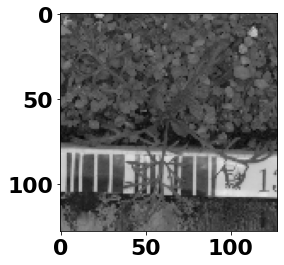

In [10]:
plt.imshow(X[0], vmin=0, vmax=255, cmap='Greys_r')

Let's apply gaussian blurring to the above image.

In [11]:
# Apply gaussian blurring
# Now we create an empty numpy array, which will be used to store the new values after applying Gaussian Blurring filter to the original image.
new_x = np.empty((4750, 128, 128))

X.shape

(4750, 128, 128)

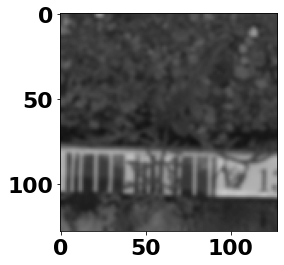

In [12]:
for idx, img in enumerate(X):
    new_x[idx] = cv2.GaussianBlur(img, (5, 5), 0)
plt.imshow(new_x[0], vmin=0, vmax=255, cmap='gray')

As you can see, the image has become somewhat blurred.

We can see the image has now been blurred

In [13]:
# Normalizing pixel values  
new_x = new_x/255.0  


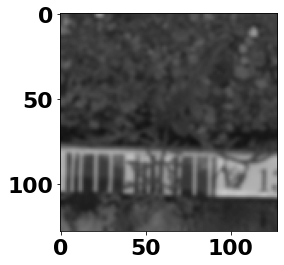

In [14]:
plt.imshow(new_x[0], vmin=0, vmax=1,cmap='gray') #if we set vmax to 255, we will see an all black image. 
#This is because all pixels have been set to a value between 0 and 1 for this step

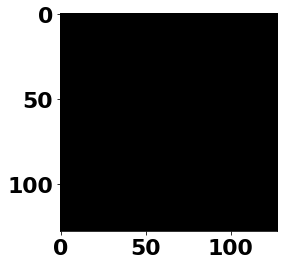

In [15]:
plt.imshow(new_x[0], vmin=0, vmax=255, cmap='Greys_r') #if we set vmax to 255, we will see an all black image. 
#This is because all pixels have been set to a value between 0 and 1 for this step
#The pixels being in a value between 0 and 1 allow them to be highly responsive to the 
#activation functions used in the CNN later

Normalizing the pixel values shifts all pixel values between 0 and 1. Because a black image has a pixel value of 0 the normalized image will appear black if vmax=255

In [16]:
X=new_x #just renaming the feature set

# Splitting the data

In [17]:
y_expanded = to_categorical(np.array(y))
X.reshape(-1,128,128,1)
X_temp, X_test, y_temp, y_test = train_test_split(X, y_expanded, test_size=0.3, random_state=1,stratify=y)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=1,stratify=y_temp)



In [18]:
print(X_train.shape, X_val.shape, X_test.shape)
print(len(y_train), len(y_val), len(y_test))

(1662, 128, 128) (1663, 128, 128) (1425, 128, 128)
1662 1663 1425


We really aren't left with that many images to train on after splitting the data. We can try a baseline model on this set, but if model performance is poor we can try to implement data augmentation to create new training images from what we have.

In [19]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

### Check the shape of the data

In [20]:
X_train.shape

(1662, 128, 128)

In [21]:
X_train=X_train.reshape(1662,128,128,1)

In [22]:
X_val.shape

(1663, 128, 128)

In [23]:
X_val=X_val.reshape(1663,128,128,1)

In [24]:
X_test.shape

(1425, 128, 128)

In [25]:
X_test=X_test.reshape(1425,128,128,1)

In [26]:
y_train.shape

(1662, 12)

We wish to predict one of 12 classes using a softmax after a dense layer.

In [27]:
X_train.shape, X_val.shape, X_test.shape

((1662, 128, 128, 1), (1663, 128, 128, 1), (1425, 128, 128, 1))

We wish to input images, each of size 128 by 128 pixels into the CNN. The images will be in gray-scale.

# Model Building 


#### Model Evaluation Criterion:

It is hard to decide whether false positives or false negatives are more bad considering the context of the problem. I would rely on overall Accuracy or F1 score to determine the validity of a model with a focus on the overall accuracy (however, I will also consider metrics on individual classes [using a classification report]  when discussing results later in this notebook. )

In [28]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('baseline_model_1', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
model = Sequential()
#
y_train=np.array(y_train)
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu', input_shape = (128,128,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
#
model.add(Conv2D(filters = 128, kernel_size = (2,2),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))
#
model.add(Conv2D(filters = 128, kernel_size = (2,2),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))

#
model.add(Conv2D(filters = 256, kernel_size = (2,2),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))

# 
model.add(Flatten())
model.add(Dense(1024, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(12, activation = "softmax"))
optimizer = Adam(learning_rate=0.0003, beta_1=0.9, beta_2=0.999)
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 64)      640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 128)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 128)       6

In [30]:
history=model.fit(X_train, 
          y_train,  #It expects integers because of the sparse_categorical_crossentropy loss function
          epochs=30, #number of iterations over the entire dataset to train on
          batch_size=64,validation_split=0.20,callbacks=[es, mc],use_multiprocessing=True) 

Epoch 1/30
21/21 [==============================] - 25s 1s/step - loss: 2.4463 - accuracy: 0.1249 - val_loss: 2.4595 - val_accuracy: 0.1291

Epoch 00001: val_accuracy improved from -inf to 0.12913, saving model to baseline_model_1
INFO:tensorflow:Assets written to: baseline_model_1\assets
Epoch 2/30
21/21 [==============================] - 24s 1s/step - loss: 2.4243 - accuracy: 0.1392 - val_loss: 2.4584 - val_accuracy: 0.1291

Epoch 00002: val_accuracy did not improve from 0.12913
Epoch 3/30
21/21 [==============================] - 24s 1s/step - loss: 2.4219 - accuracy: 0.1415 - val_loss: 2.4600 - val_accuracy: 0.1291

Epoch 00003: val_accuracy did not improve from 0.12913
Epoch 4/30
21/21 [==============================] - 24s 1s/step - loss: 2.4226 - accuracy: 0.1415 - val_loss: 2.4576 - val_accuracy: 0.1291

Epoch 00004: val_accuracy did not improve from 0.12913
Epoch 5/30
21/21 [==============================] - 24s 1s/step - loss: 2.4251 - accuracy: 0.1354 - val_loss: 2.4516 - val

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


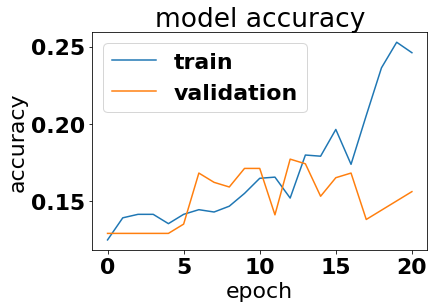

In [31]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

After 21 epochs, early stopping kicked in. The Crossval accuracy of the model is poor, and it seems like the model is about to begin severely overfitting.

In [32]:
model.evaluate(X_val,y_val)

52/52 [==============================] - 6s 114ms/step - loss: 2.3386 - accuracy: 0.1642


[2.3386011123657227, 0.16416116058826447]

In [40]:
y_test_pred_bl1=model.predict(X_test)
y_test_pred_classes_bl1 = np.argmax(y_test_pred_bl1, axis=1)
y_test_pred_classes_bl1 = to_categorical(np.array(y_test_pred_classes_bl1))
y_test_pred_prob_bl1 = np.max(y_test_pred_bl1, axis=1)

In [41]:
# Test Accuracy 

accuracy_score(np.array(y_test), y_test_pred_classes_bl1)

0.15929824561403508

The model only scores 15.9% accuracy on the test set. 

<AxesSubplot:>

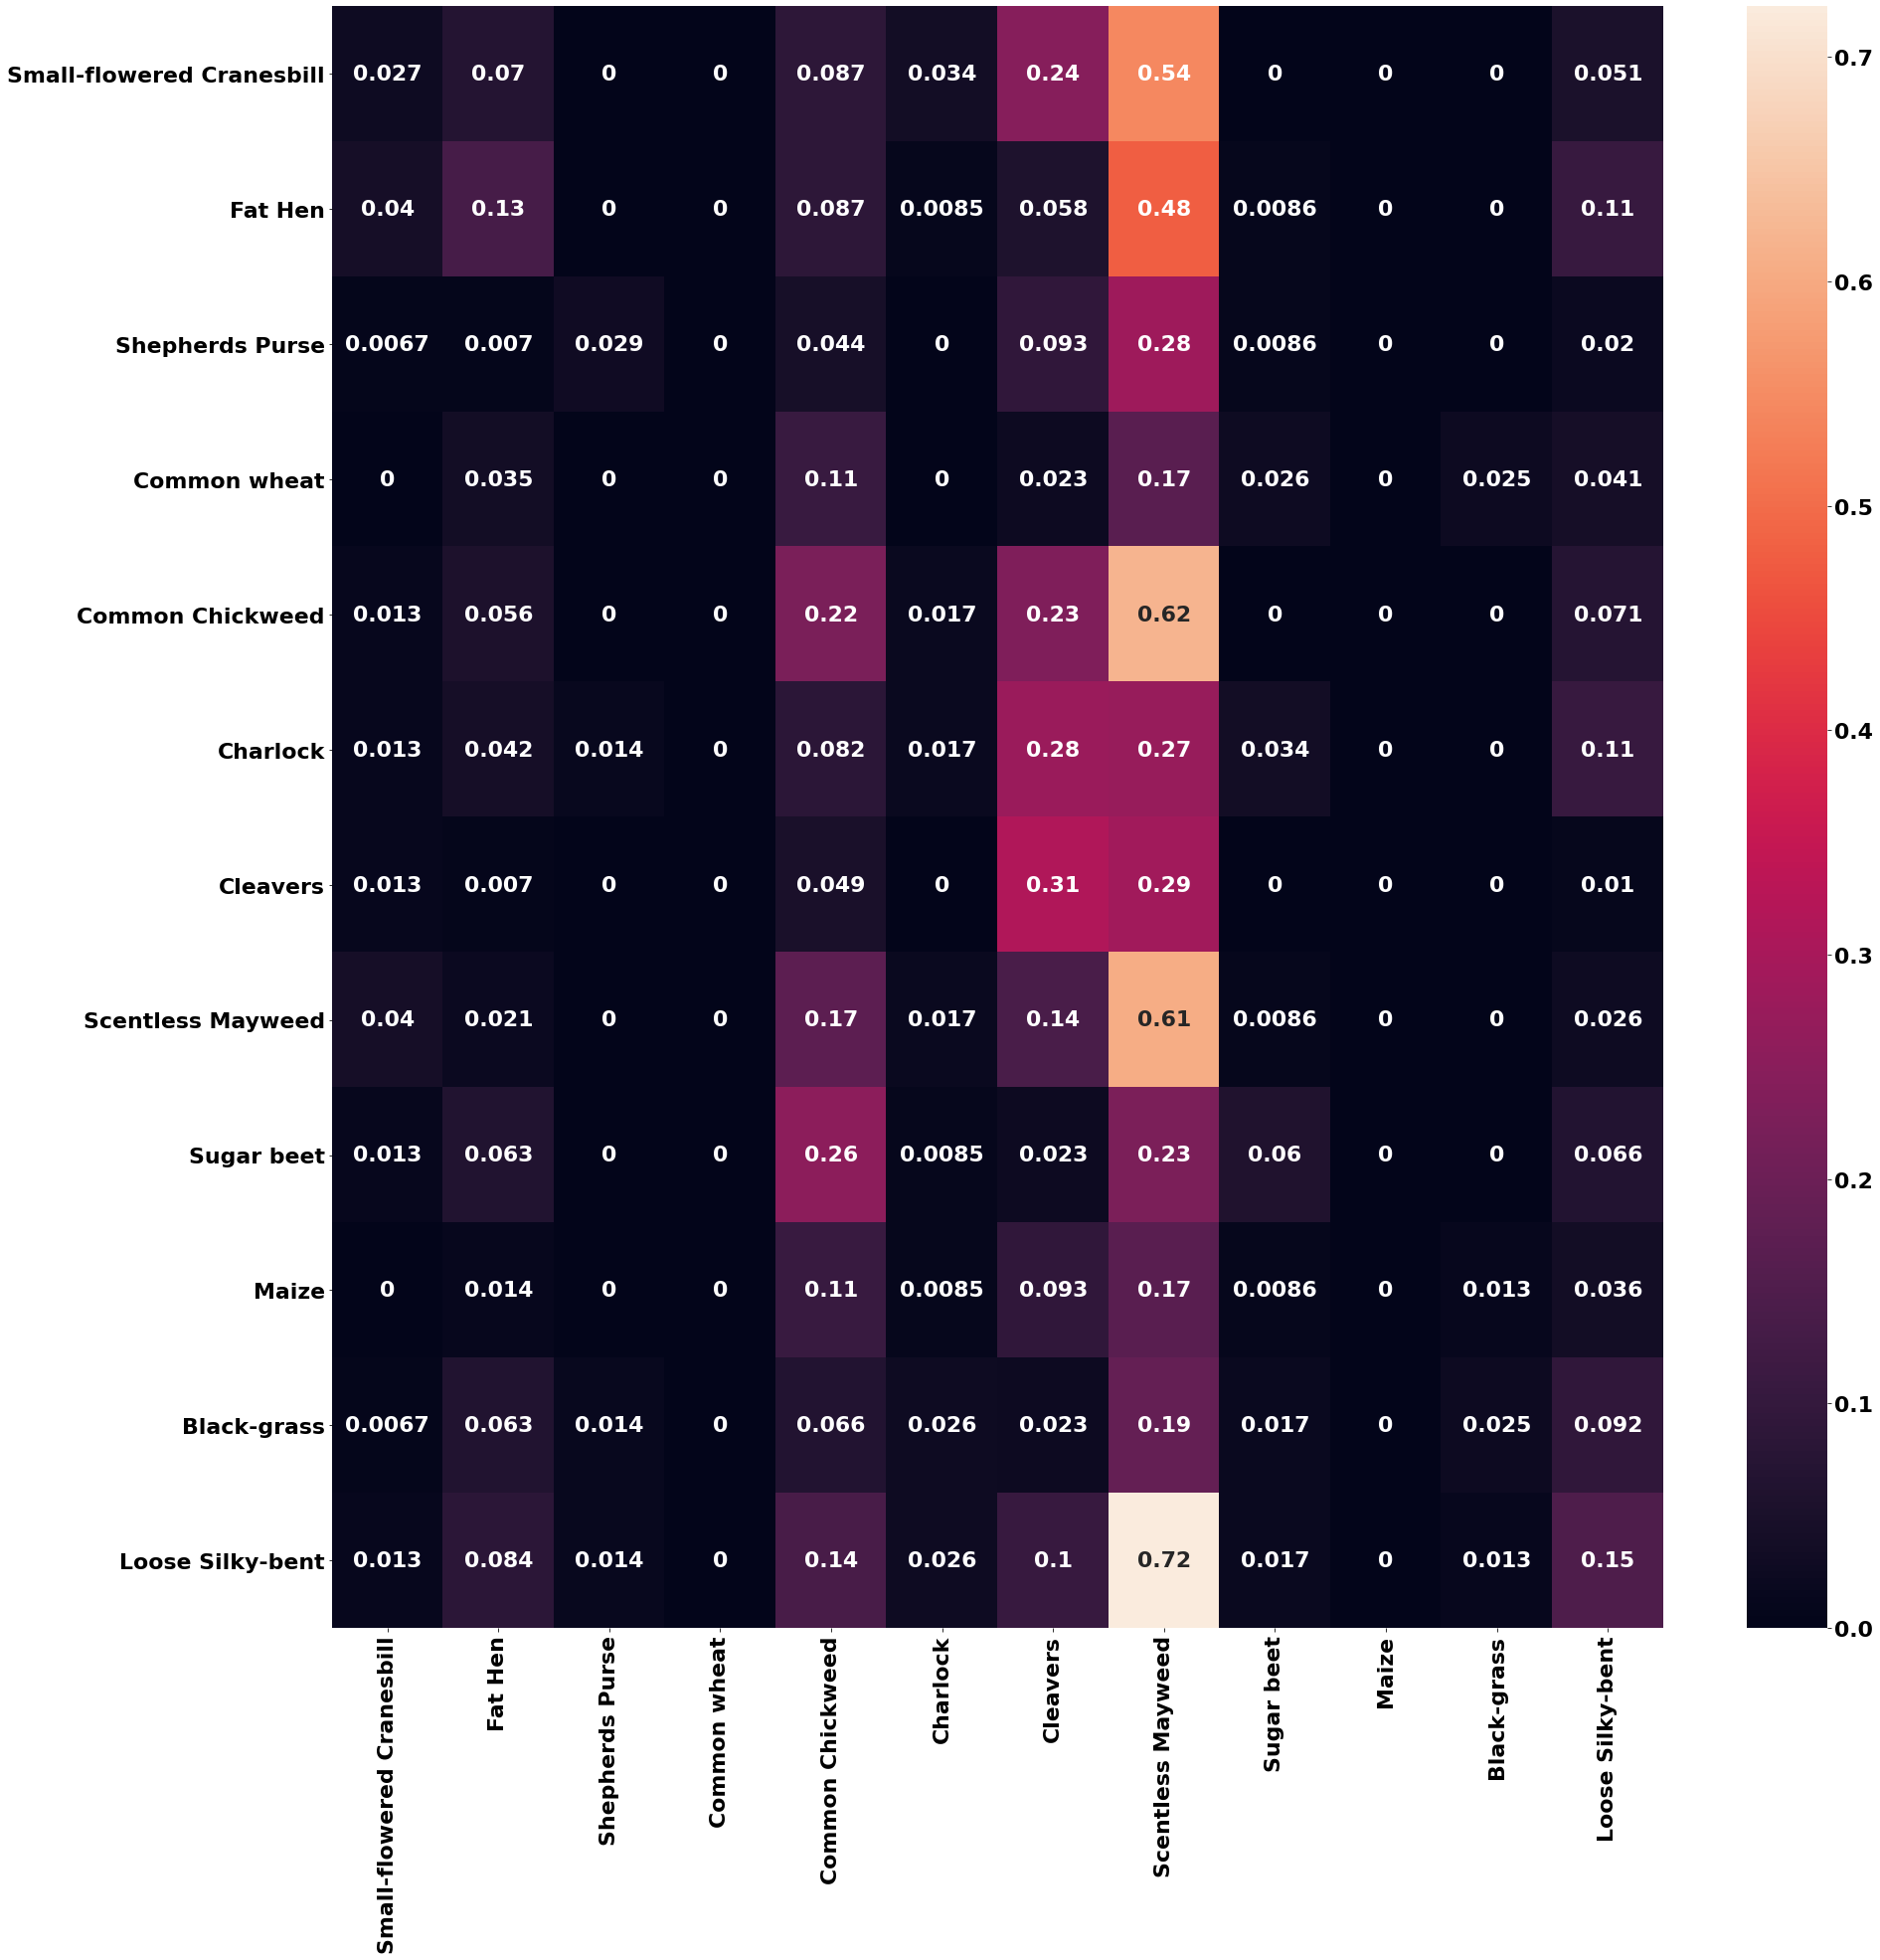

In [46]:
cf_matrix = confusion_matrix(np.array(y_test).argmax(axis=1), np.array(y_test_pred_classes_bl1).argmax(axis=1))

# Confusion matrix normalized per category true value
cf_matrix_n1 = cf_matrix/np.sum(cf_matrix, axis=1)
plt.figure(figsize=(30,30))
sns.heatmap(cf_matrix_n1, xticklabels=CATEGORIES, yticklabels=CATEGORIES, annot=True)

We can see that the baseline model isn't able to learn enough about the least represented classes. It never predicted Maize or Common wheat a single time. It is also confusing Scentless Mayweed with other species.

In [47]:
print("=== Classification Report ===")
print(classification_report(y_test, y_test_pred_classes_bl1))

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.14      0.03      0.05       149
           1       0.22      0.13      0.17       143
           2       0.40      0.03      0.05        69
           3       0.00      0.00      0.00        66
           4       0.16      0.22      0.18       183
           5       0.11      0.02      0.03       117
           6       0.19      0.31      0.24        86
           7       0.13      0.61      0.22       155
           8       0.32      0.06      0.10       116
           9       0.00      0.00      0.00        66
          10       0.33      0.03      0.05        79
          11       0.19      0.15      0.17       196

   micro avg       0.16      0.16      0.16      1425
   macro avg       0.18      0.13      0.10      1425
weighted avg       0.18      0.16      0.12      1425
 samples avg       0.16      0.16      0.16      1425



C:\Users\nedal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


We can see that the above model is over fitting greatly and also performing poorly. We can try altering the architecture of our CNN to see if anything helps:

We will try a less complex network:
* removing an entire layer of convolution, pooling, and drop out
* reducing number of filters in each convolutional layer

In [48]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('baseline_model_2', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
model = Sequential()
#

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu', input_shape = (128,128,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#

model.add(Conv2D(filters = 64, kernel_size = (2,2),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))
#
model.add(Conv2D(filters = 32, kernel_size = (2,2),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))

# 

model.add(Flatten())
model.add(Dense(512, activation = "relu"))
model.add(Dropout(0.25))
model.add(Dense(12, activation = "softmax"))
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

C:\Users\nedal\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [49]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 128, 128, 64)      640       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 64, 64, 64)        16448     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 32)       

In [50]:
history=model.fit(X_train, 
          y_train,  #It expects integers because of the sparse_categorical_crossentropy loss function
          epochs=50, #number of iterations over the entire dataset to train on
          batch_size=64,validation_split=0.20,callbacks=[es, mc],use_multiprocessing=True)#number of samples per gradient update for training 

Epoch 1/50
21/21 [==============================] - 15s 721ms/step - loss: 2.4519 - accuracy: 0.1384 - val_loss: 2.4635 - val_accuracy: 0.1381

Epoch 00001: val_accuracy improved from -inf to 0.13814, saving model to baseline_model_2
INFO:tensorflow:Assets written to: baseline_model_2\assets
Epoch 2/50
21/21 [==============================] - 15s 724ms/step - loss: 2.4336 - accuracy: 0.1354 - val_loss: 2.4519 - val_accuracy: 0.1291

Epoch 00002: val_accuracy did not improve from 0.13814
Epoch 3/50
21/21 [==============================] - 15s 718ms/step - loss: 2.4204 - accuracy: 0.1317 - val_loss: 2.4541 - val_accuracy: 0.1291

Epoch 00003: val_accuracy did not improve from 0.13814
Epoch 4/50
21/21 [==============================] - 15s 723ms/step - loss: 2.4234 - accuracy: 0.1415 - val_loss: 2.4574 - val_accuracy: 0.1742

Epoch 00004: val_accuracy improved from 0.13814 to 0.17417, saving model to baseline_model_2
INFO:tensorflow:Assets written to: baseline_model_2\assets
Epoch 5/50
21

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


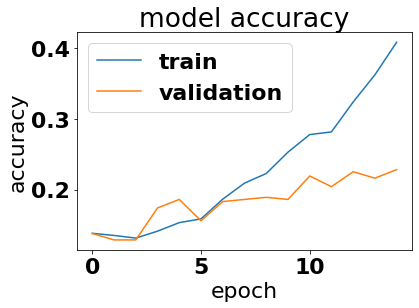

In [51]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [55]:
model.evaluate(X_val,y_val)

52/52 [==============================] - 4s 79ms/step - loss: 2.3999 - accuracy: 0.2129


[2.399946451187134, 0.21286830306053162]

In [56]:
y_test_pred_bl2=model.predict(X_test)
y_test_pred_classes_bl2 = np.argmax(y_test_pred_bl2, axis=1)
y_test_pred_classes_bl2 = to_categorical(np.array(y_test_pred_classes_bl2))
y_test_pred_prob_bl2 = np.max(y_test_pred_bl2, axis=1)

In [57]:
# Test Accuracy 

accuracy_score(np.array(y_test), y_test_pred_classes_bl2)

0.1943859649122807

The testing accuracy is slightly better than the other baseline model at 19.4%

However, this model is overfitting even more than the last.

<AxesSubplot:>

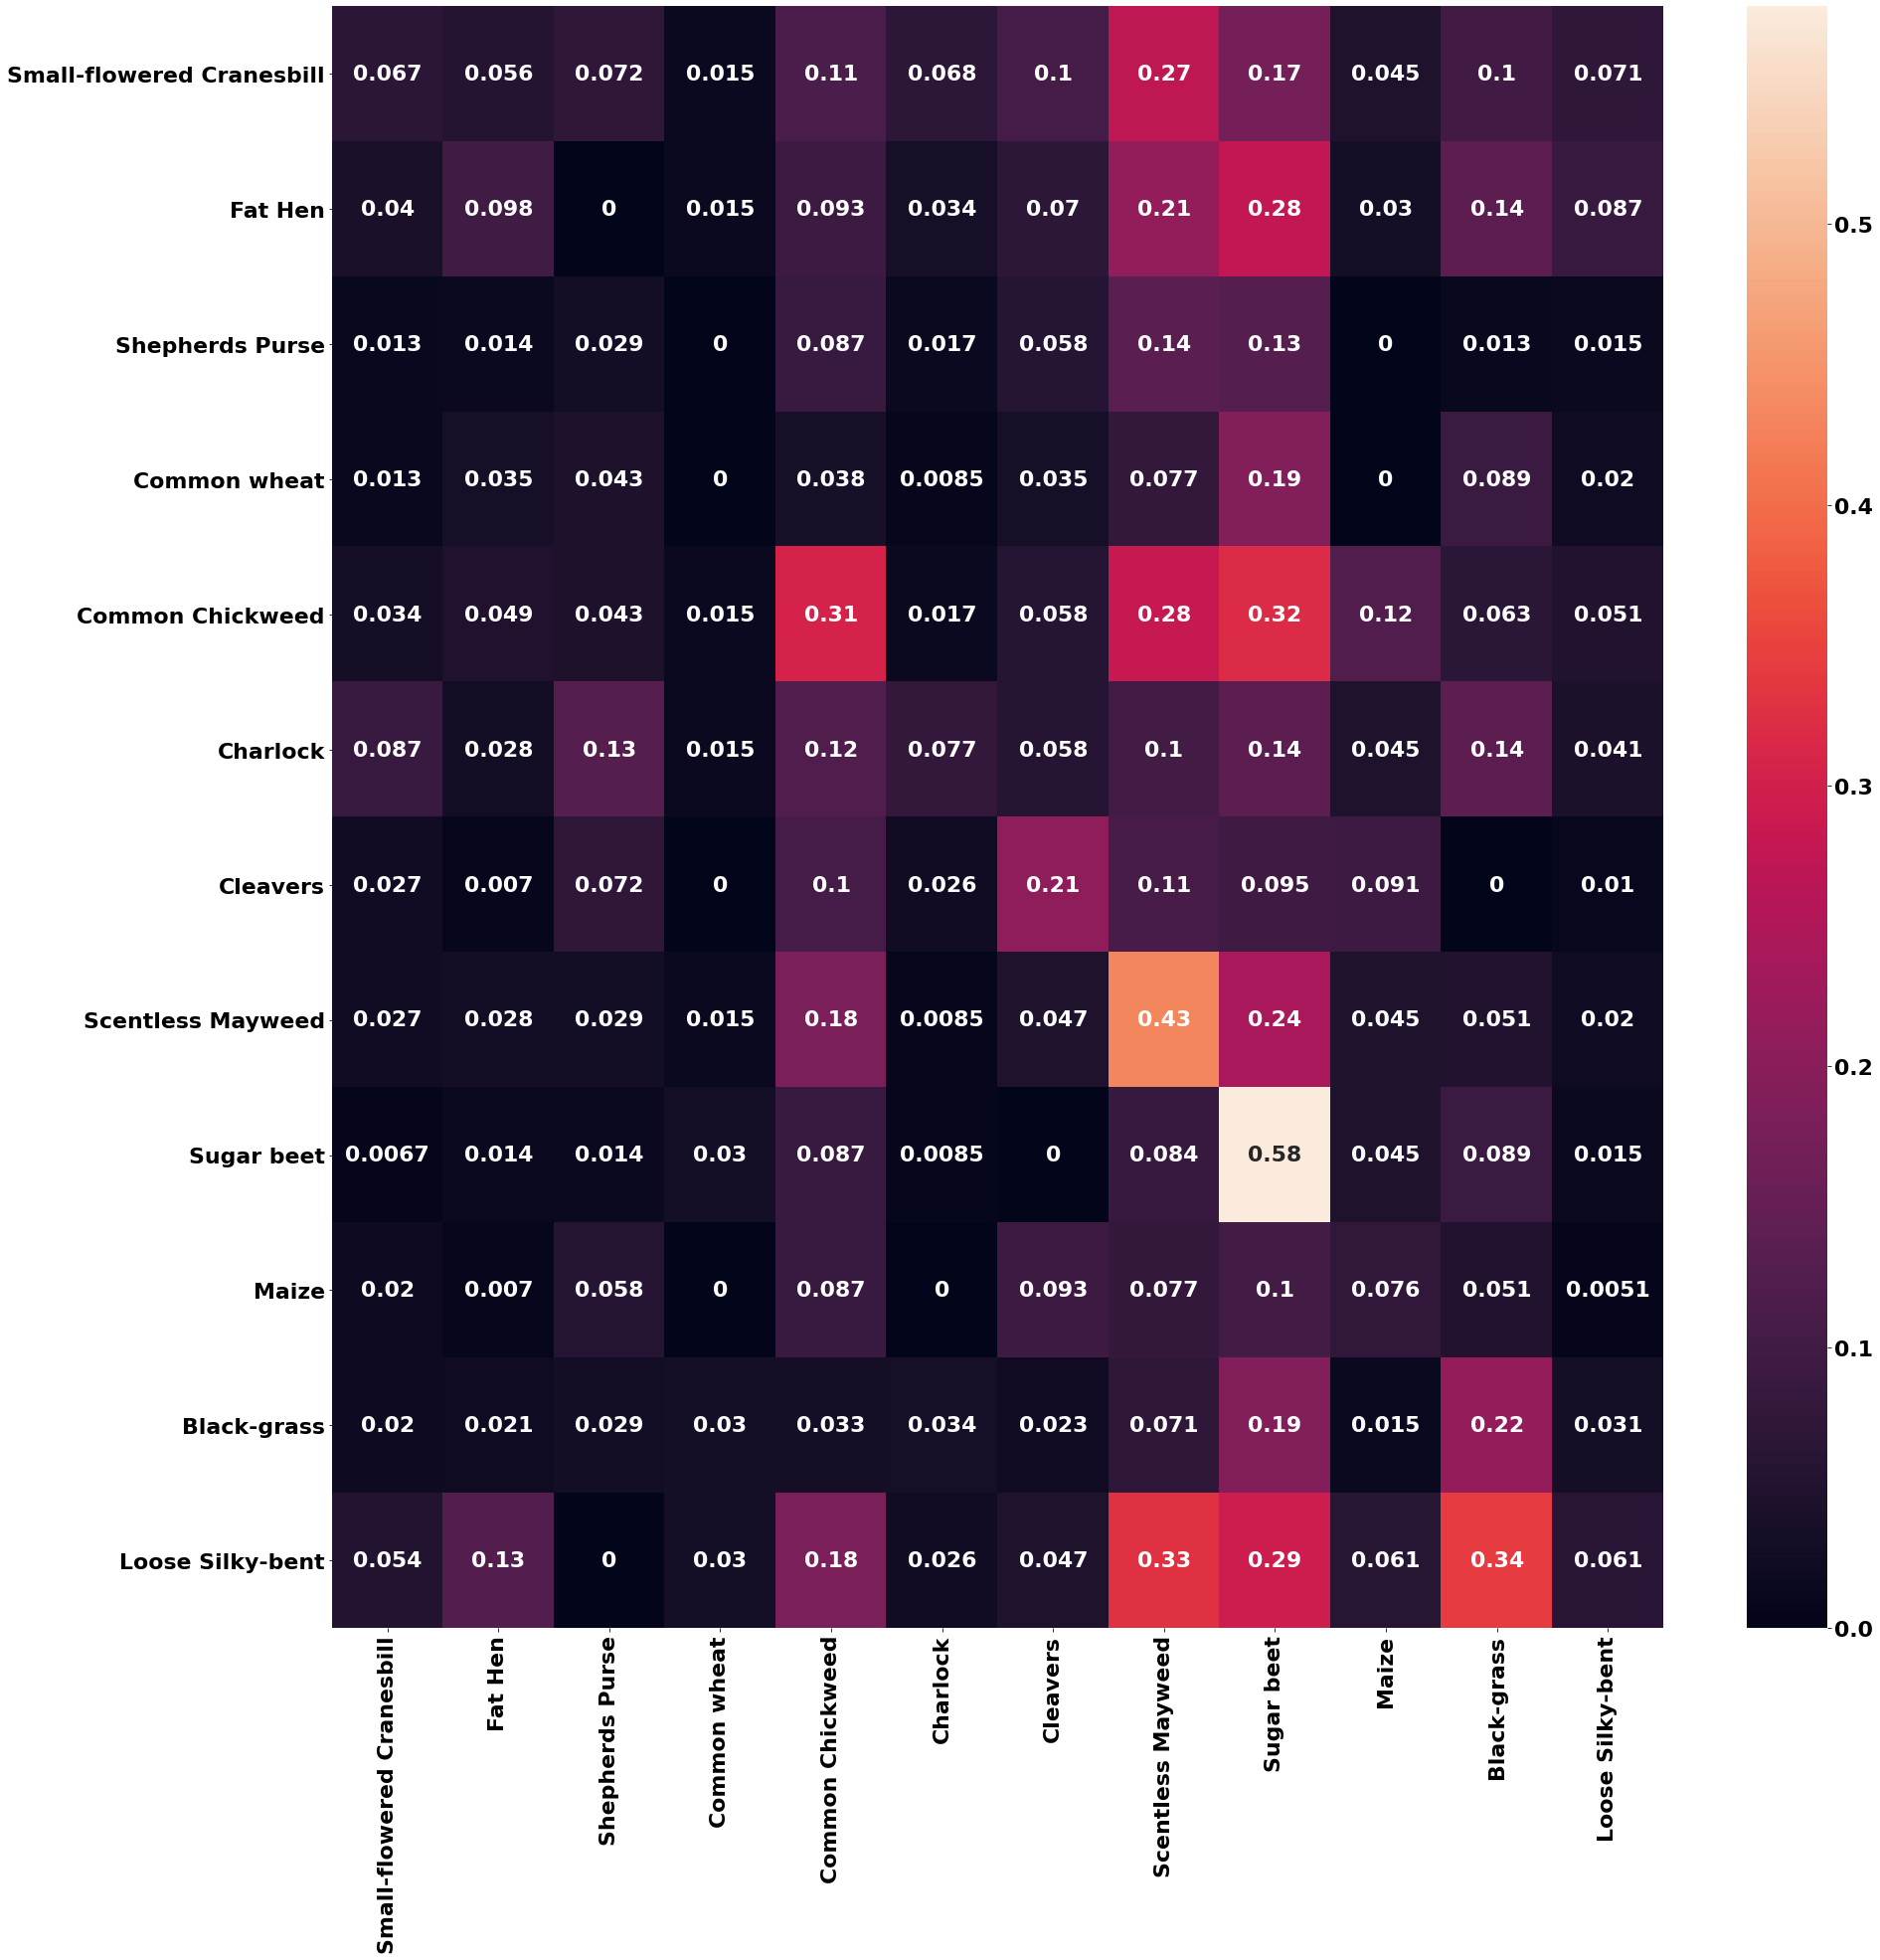

In [58]:
cf_matrix = confusion_matrix(np.array(y_test).argmax(axis=1), np.array(y_test_pred_classes_bl2).argmax(axis=1))

# Confusion matrix normalized per category true value
cf_matrix_n1 = cf_matrix/np.sum(cf_matrix, axis=1)
plt.figure(figsize=(30,30))
sns.heatmap(cf_matrix_n1, xticklabels=CATEGORIES, yticklabels=CATEGORIES, annot=True)

The model is actually predicting The two classes it completely ignored in the first baseline model. So we will take this model and continue to try and improve it by creating more training images using data augmentation

In [59]:
print("=== Classification Report ===")
print(classification_report(y_test, y_test_pred_classes_bl1))

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.14      0.03      0.05       149
           1       0.22      0.13      0.17       143
           2       0.40      0.03      0.05        69
           3       0.00      0.00      0.00        66
           4       0.16      0.22      0.18       183
           5       0.11      0.02      0.03       117
           6       0.19      0.31      0.24        86
           7       0.13      0.61      0.22       155
           8       0.32      0.06      0.10       116
           9       0.00      0.00      0.00        66
          10       0.33      0.03      0.05        79
          11       0.19      0.15      0.17       196

   micro avg       0.16      0.16      0.16      1425
   macro avg       0.18      0.13      0.10      1425
weighted avg       0.18      0.16      0.12      1425
 samples avg       0.16      0.16      0.16      1425



C:\Users\nedal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


We can see that the less intricate model also performs poorly. We might try implementing transfer learning as well as data augmentation.

# Generate additional training data points :

### Data Augmentation

In most of the real life case studies, it is generally difficult to collect lots and lots of images and then train the CNNs. In that case we can take help of the data augmentation techniques. CNNs have the property of **translational invariance** i.e it can recognize an object as an object, even when its appearance varies in some way. Taking this property into consideration, we can augment the images using following techniques - 

1. Horizontal flip (should be set to True/False)
2. Vertical flip (should be set to True/False)
3. Height Shift (should be between 0 and 1)
4. Width Shift (should be between 0 and 1)
5. Rotation (should be between 0 and 180)
6. Shear (should be between 0 and 1)
7. Zoom (should be between 0 and 1) etc.

We will try out different values for the parameters, and then make some conclusions after visualizing the images. What values of the above the parameters might or might not be appropriate for these imaging based on what we might see in the real world. Remember ***not to use data augmentation in validation data set***.

In [60]:
train_datagen = ImageDataGenerator(
                              horizontal_flip = True,
                              vertical_flip = True, 
                              height_shift_range= 0.1, 
                              width_shift_range=0.1, 
                              rotation_range=50, 
                              shear_range = 0.1,
                              zoom_range=0.1
                                    )

In [61]:
X_train.shape

(1662, 128, 128, 1)

C:\Users\nedal\anaconda3\lib\site-packages\matplotlib\text.py:1163: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


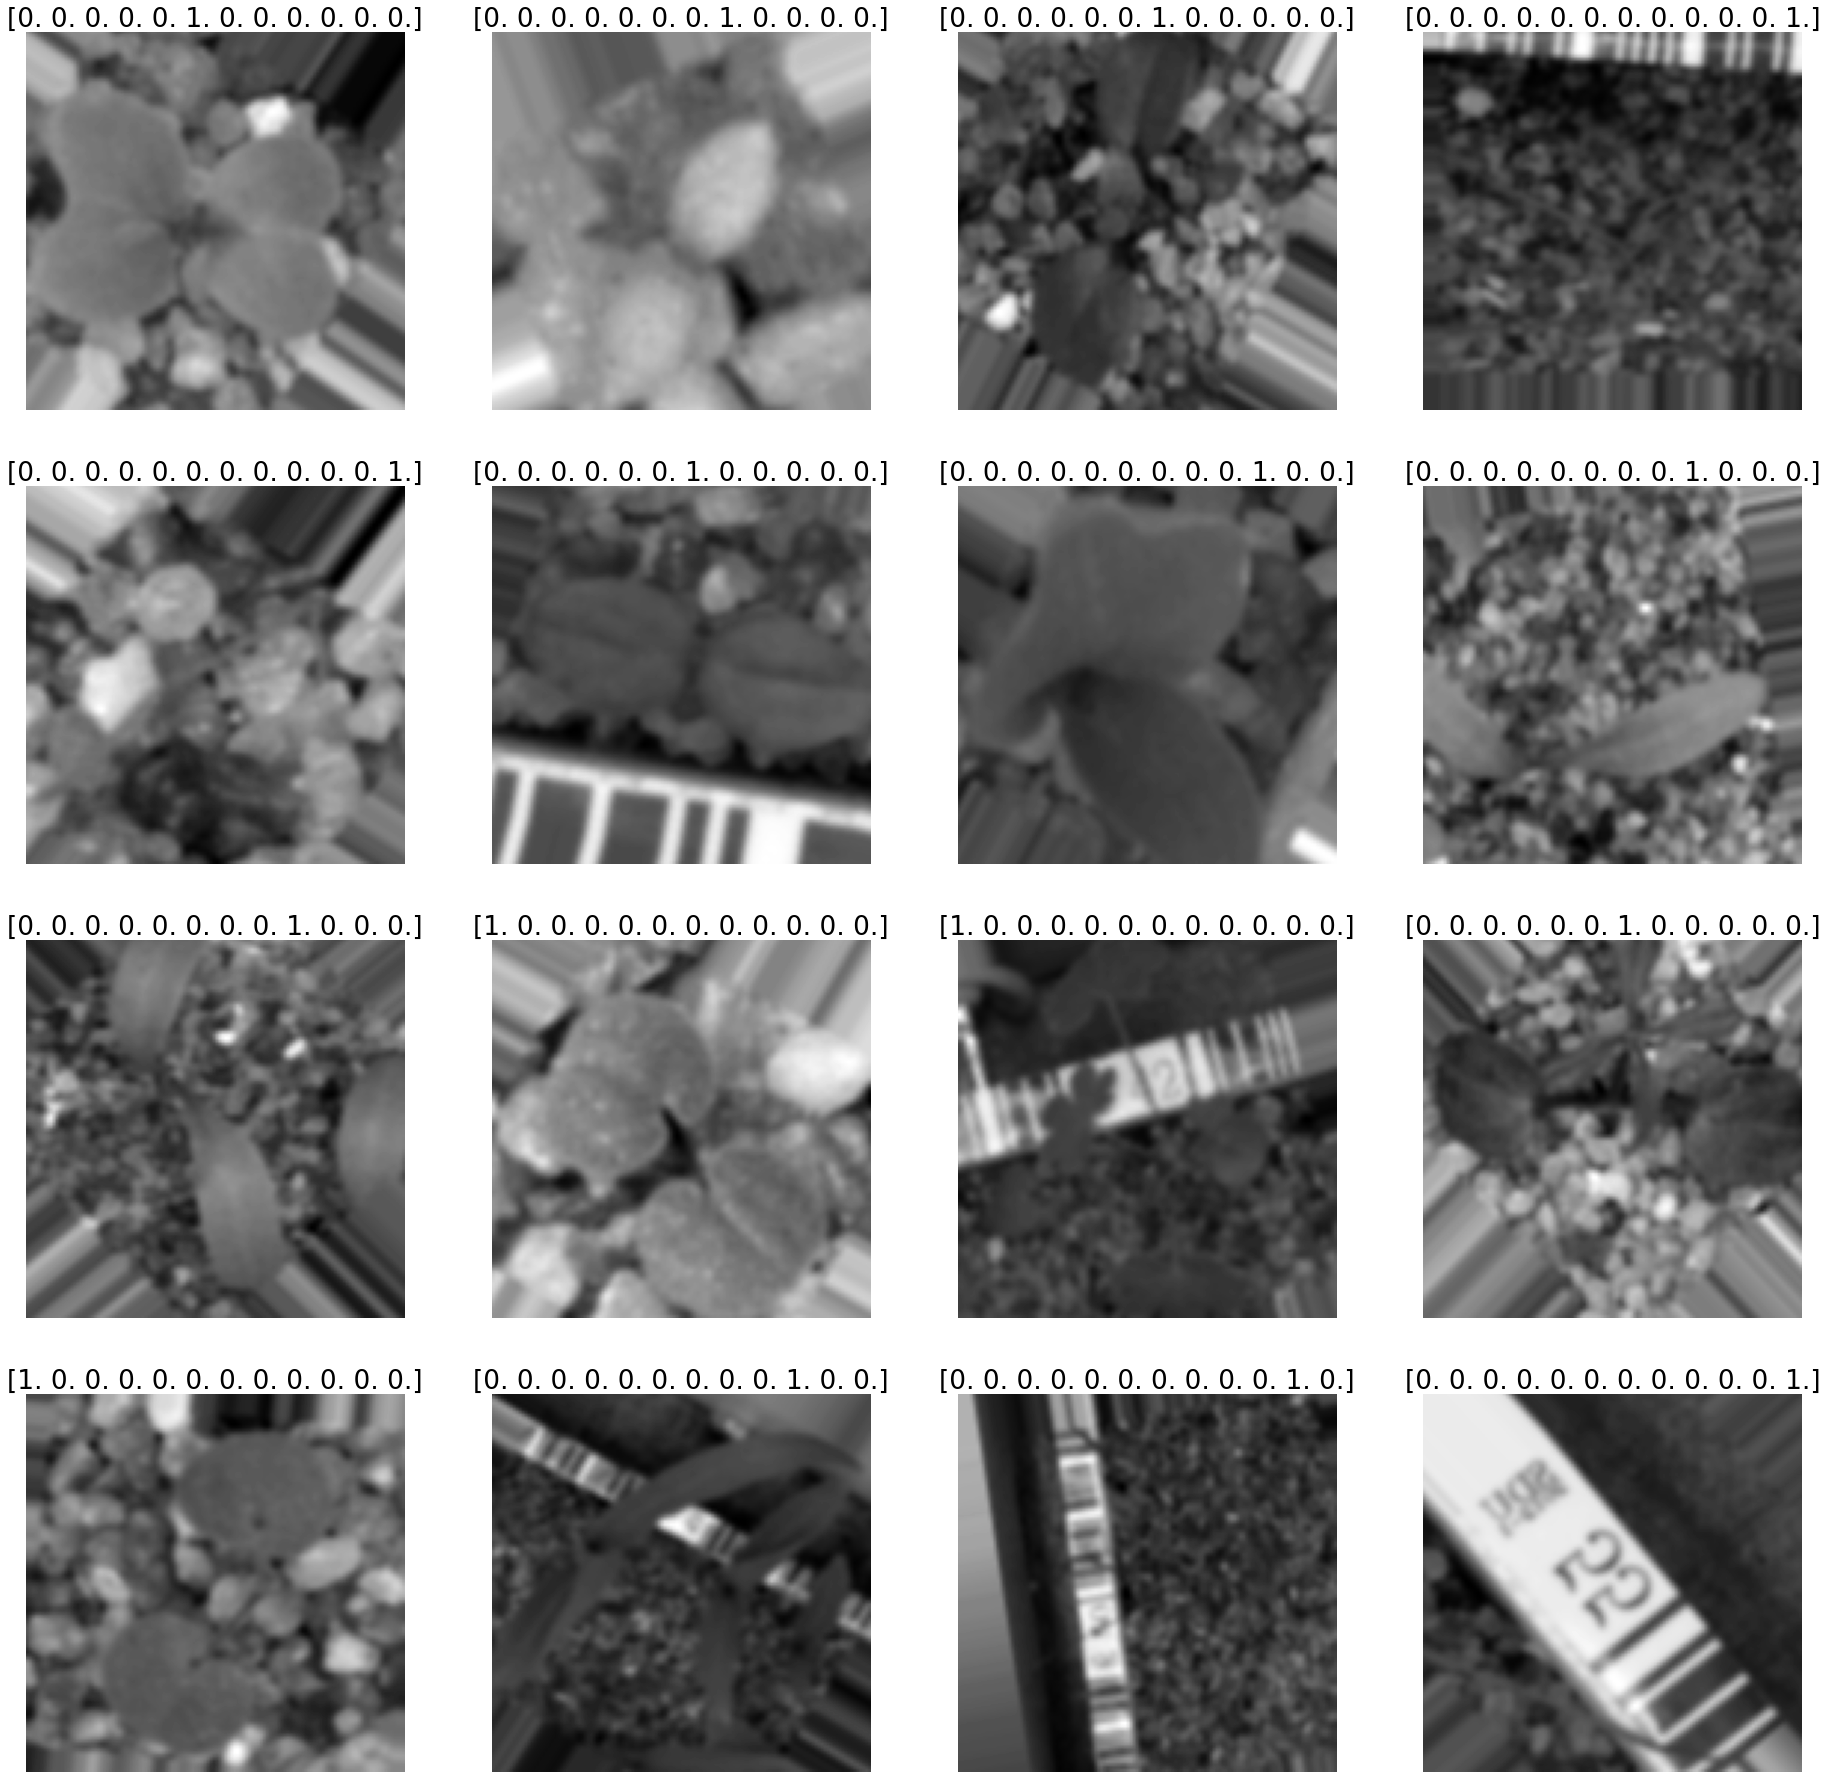

In [62]:
X_train_2=[] #augmented training set
y_train_2=[] #Augmented labels

while len(X_train_2) < 20000: #lets makea  training set with 20,000 images based off the original training set 
                                #with the above mentioned augmentations applied randomly.
    train_generator = train_datagen.flow(X_train,y_train,batch_size=1662)
    images, labels = next(train_generator) #take a next batch of images 
    for image, label in zip(images, labels):       
        X_train_2.append(image)
        y_train_2.append(label)
fig, axes = plt.subplots(4, 4, figsize = (32,32))
#fig.set_size_inches(32, 32)

for (image, label, ax) in zip(images, labels, axes.flatten()):
    #print(image.shape)
    ax.imshow(image, cmap='gray')
    ax.axis('off')
    ax.set_title(label)

The augmented images are displayed above. You can see rotational augmentations easier than the others to verify that the augmentations have been performed. You can also see that images were translated a distance horizontally for instance and the pixels left behind are static copies of the edge pixel from the rotation. 

We can put our new augmented training set into the appropriate input_shape for the CNN and see how it performs:

In [63]:
X_train.shape

(1662, 128, 128, 1)

21606
(21606, 128, 128, 1)
21606
(21606, 12)


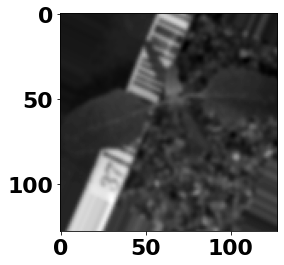

In [64]:
plt.imshow(X_train_2[0],cmap='gray')
X_train_2=np.asarray(X_train_2)
y_train_2=np.asarray(y_train_2)
print(len(X_train_2))
print(X_train_2.shape)
print(len(y_train_2))
print(y_train_2.shape)

we can already see the benefits of using the image data augmentor. Instead of having less than 2000 training instances, we now have more than 21,000. That's over a 10 fold increase. These extra training points, I suspect, are exactly what the model needs. 


First let's try the augmented data on the baseline model 2 as it was predicting all classes. If we are not satisfied with the output we can try the more complex baseline model 1.

In [66]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('best_model_augmented', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
model = Sequential()
#

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu', input_shape = (128,128,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#

model.add(Conv2D(filters = 64, kernel_size = (2,2),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))
#
model.add(Conv2D(filters = 32, kernel_size = (2,2),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))

# 

model.add(Flatten())
model.add(Dense(512, activation = "relu"))
model.add(Dropout(0.25))
model.add(Dense(12, activation = "softmax"))
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])




C:\Users\nedal\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [67]:
epochs = 10  
batch_size = 64


history=model.fit(X_train_2, 
          y_train_2,  #It expects integers because of the sparse_categorical_crossentropy loss function
          epochs=200, #number of iterations over the entire dataset to train on
          batch_size=128,validation_split=0.20,callbacks=[es, mc],use_multiprocessing=True)#number of samples per gradient update for training 
                  


Epoch 1/200
136/136 [==============================] - 191s 1s/step - loss: 2.4213 - accuracy: 0.1417 - val_loss: 2.4069 - val_accuracy: 0.1682

Epoch 00001: val_accuracy improved from -inf to 0.16821, saving model to best_model_augmented
INFO:tensorflow:Assets written to: best_model_augmented\assets
Epoch 2/200
136/136 [==============================] - 198s 1s/step - loss: 2.3248 - accuracy: 0.1722 - val_loss: 2.2936 - val_accuracy: 0.1941

Epoch 00002: val_accuracy improved from 0.16821 to 0.19412, saving model to best_model_augmented
INFO:tensorflow:Assets written to: best_model_augmented\assets
Epoch 3/200
136/136 [==============================] - 196s 1s/step - loss: 2.2399 - accuracy: 0.2153 - val_loss: 2.2340 - val_accuracy: 0.2078

Epoch 00003: val_accuracy improved from 0.19412 to 0.20777, saving model to best_model_augmented
INFO:tensorflow:Assets written to: best_model_augmented\assets
Epoch 4/200
136/136 [==============================] - 199s 1s/step - loss: 2.1458 - acc

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


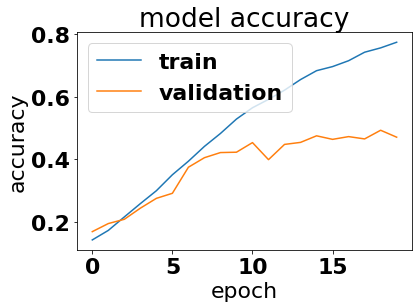

In [68]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [69]:
model.evaluate(X_val,y_val)

52/52 [==============================] - 4s 81ms/step - loss: 2.2259 - accuracy: 0.4041


[2.2258787155151367, 0.4040890038013458]

In [77]:
y_test_pred_augmented=model.predict(X_test)
y_test_pred_classes_augmented = np.argmax(y_test_pred_augmented, axis=1)
y_test_pred_classes_augmented = to_categorical(np.array(y_test_pred_classes_augmented))
y_test_pred_prob_augmented = np.max(y_test_pred_augmented, axis=1)

In [78]:
# Test Accuracy 

accuracy_score(np.array(y_test), y_test_pred_classes_augmented)

0.38666666666666666

The model concludes training with a crossval accuracy of 50%, however in testing the accuracy dropped to 38.6%. Let's look at the Confusion Matrix and classification report to get more information about what went wrong

<AxesSubplot:>

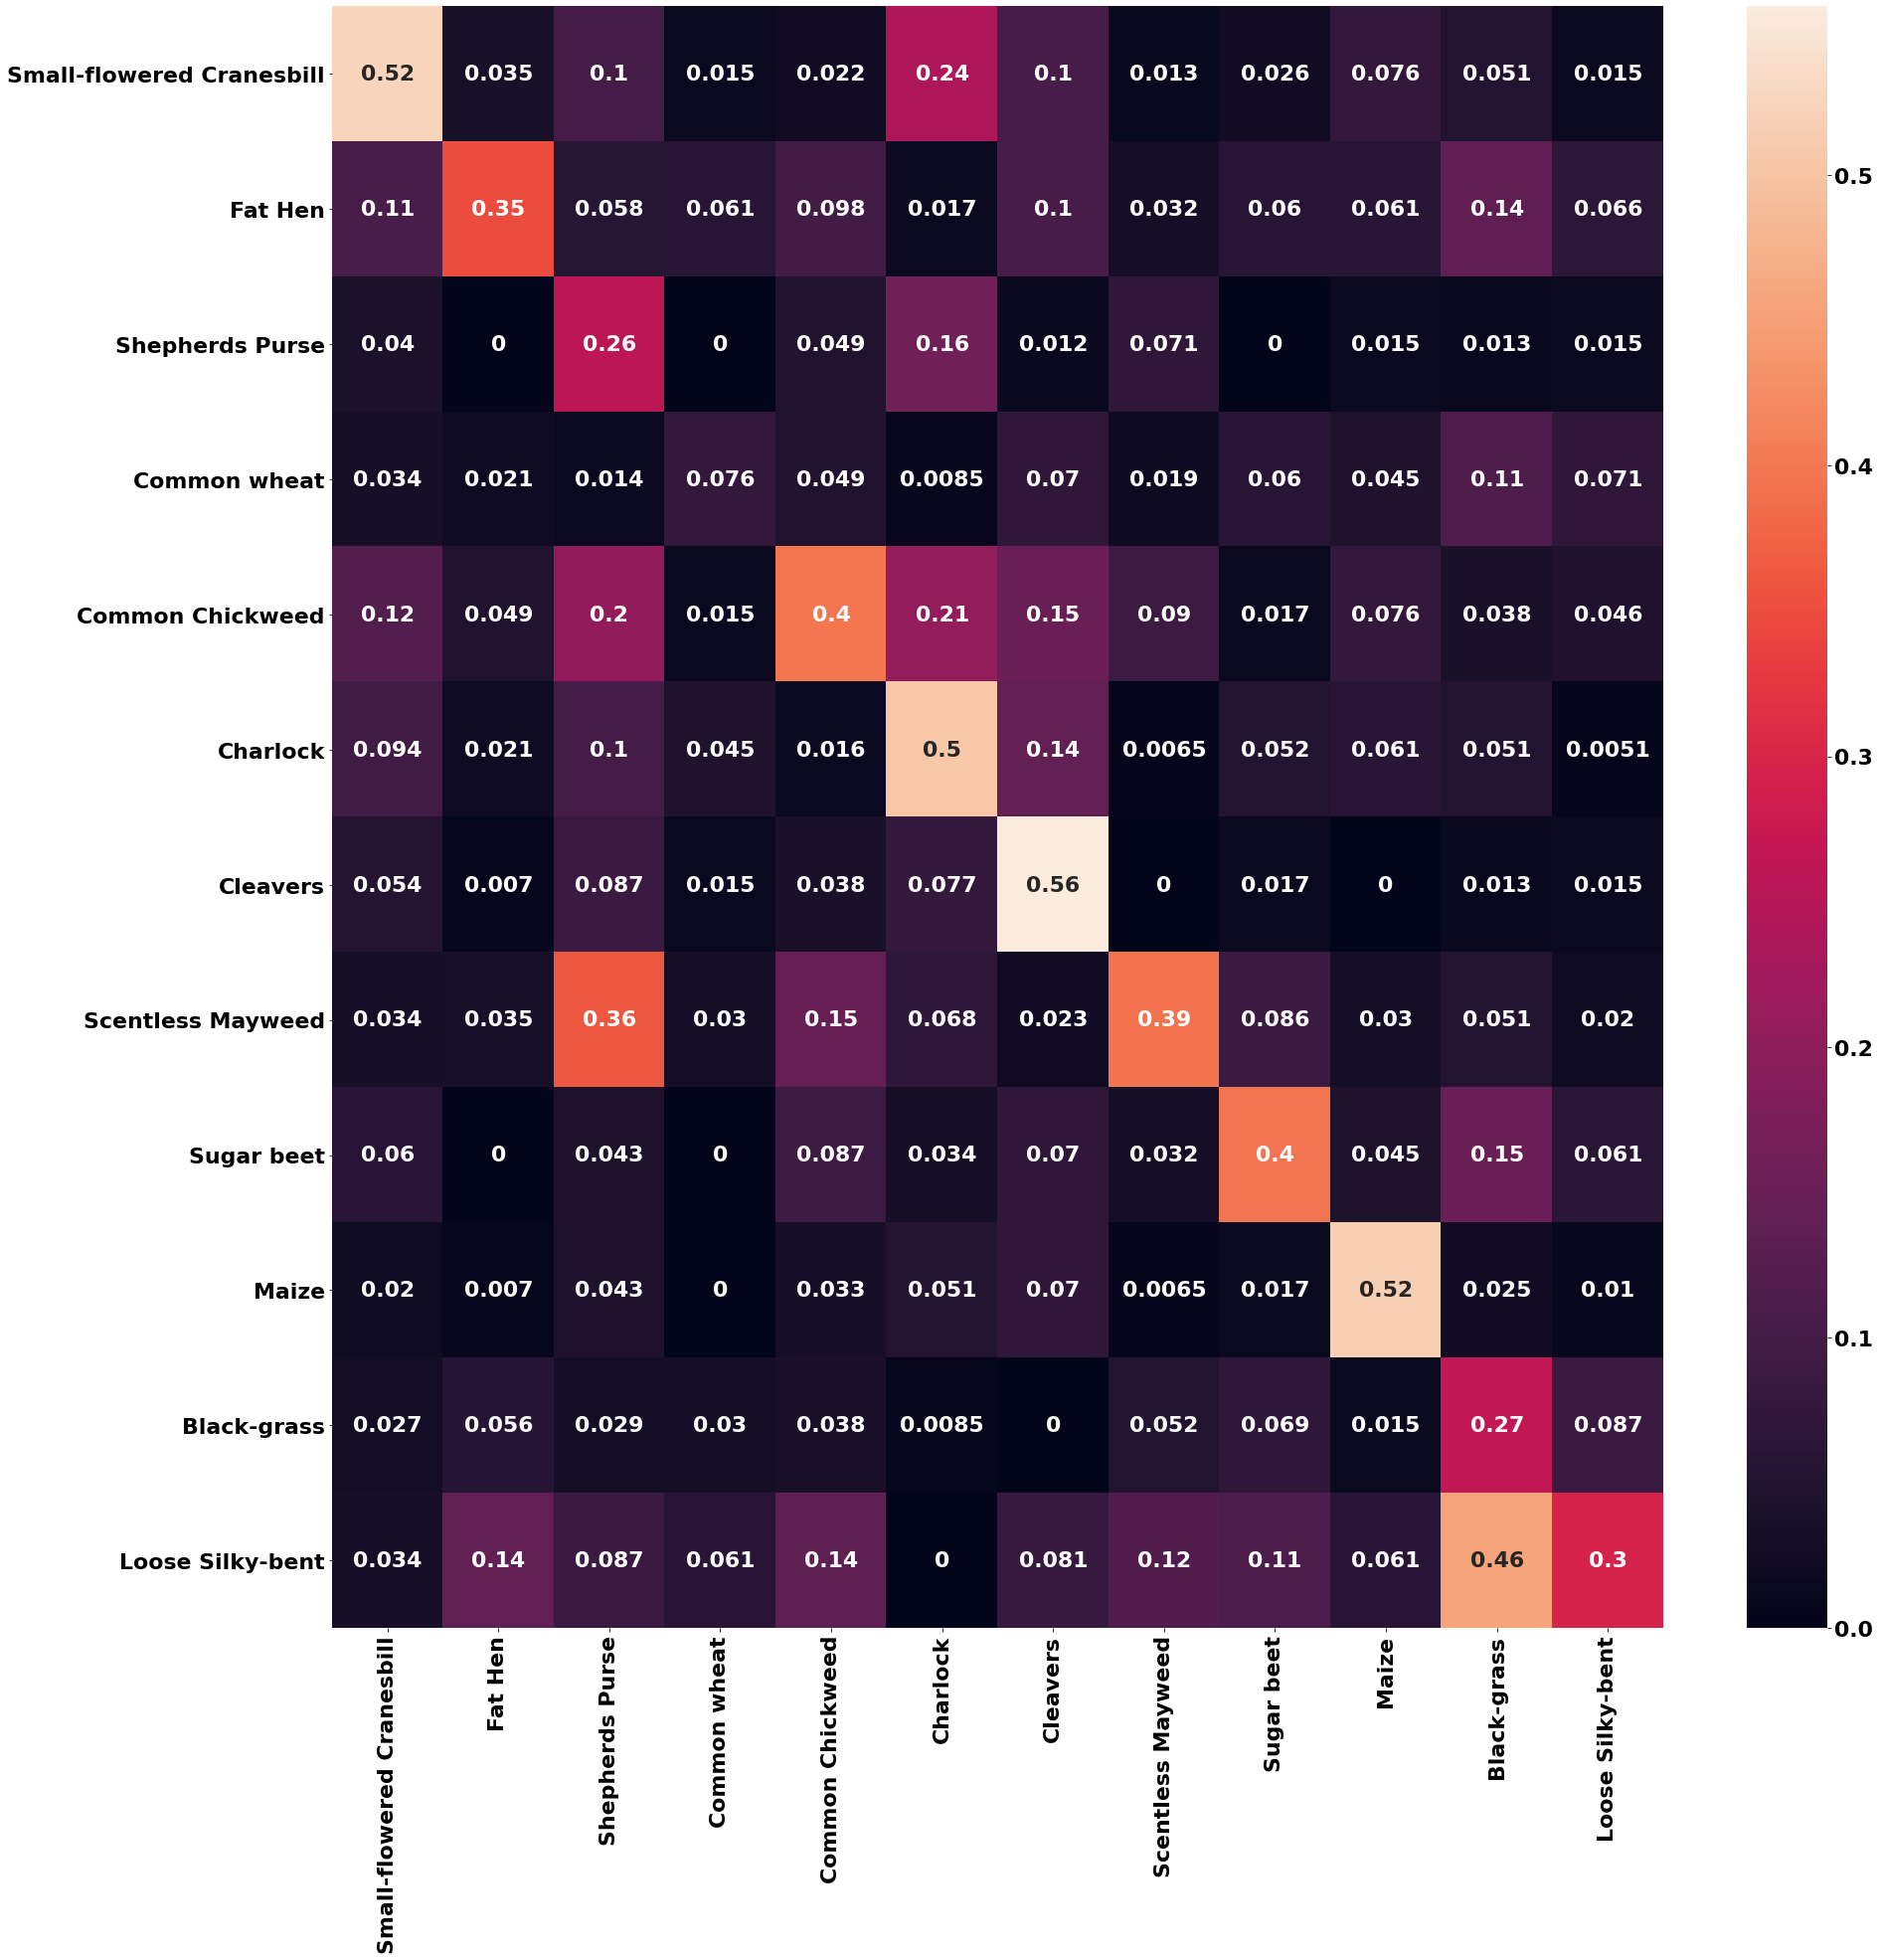

In [80]:
cf_matrix = confusion_matrix(np.array(y_test).argmax(axis=1), np.array(y_test_pred_classes_augmented).argmax(axis=1))

# Confusion matrix normalized per category true value
cf_matrix_n1 = cf_matrix/np.sum(cf_matrix, axis=1)
plt.figure(figsize=(30,30))
sns.heatmap(cf_matrix_n1, xticklabels=CATEGORIES, yticklabels=CATEGORIES, annot=True)

In [81]:
print("=== Classification Report ===")
print(classification_report(y_test, y_test_pred_classes_augmented))

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.46      0.52      0.49       149
           1       0.49      0.35      0.41       143
           2       0.19      0.26      0.22        69
           3       0.22      0.08      0.11        66
           4       0.36      0.40      0.38       183
           5       0.37      0.50      0.42       117
           6       0.40      0.56      0.47        86
           7       0.47      0.39      0.43       155
           8       0.43      0.40      0.41       116
           9       0.52      0.52      0.52        66
          10       0.19      0.27      0.22        79
          11       0.42      0.30      0.35       196

   micro avg       0.39      0.39      0.39      1425
   macro avg       0.38      0.38      0.37      1425
weighted avg       0.39      0.39      0.38      1425
 samples avg       0.39      0.39      0.39      1425



The results are much better but I think there is a lot more room for improvement. The test score is only 38% accuracy and it appears that the performance on class 3 is drastically worse than the rest. I suspect additional filters will give the model the capabilities of finding patterns than can identify this class and for that matter all of the classes better.



Let's try the augmented dataset on baseline model 1, which was the one with an additional layer and more filters in each layer.

In [82]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5) #instantiate early stopping
mc = ModelCheckpoint('best_model_augmented2', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True) 
#set a checkpoint
model = Sequential()

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu', input_shape = (128,128,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
#
model.add(Conv2D(filters = 128, kernel_size = (2,2),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))
#
model.add(Conv2D(filters = 128, kernel_size = (2,2),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))

#
model.add(Conv2D(filters = 256, kernel_size = (2,2),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))

# 
model.add(Flatten())
model.add(Dense(1024, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(12, activation = "softmax"))
optimizer = Adam(learning_rate=0.0003, beta_1=0.9, beta_2=0.999)
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [83]:
history=model.fit(X_train_2, 
          y_train_2,  #It expects integers because of the sparse_categorical_crossentropy loss function
          epochs=200, #number of iterations over the entire dataset to train on
          batch_size=128,validation_split=0.20,callbacks=[es, mc],use_multiprocessing=True)#number of samples per gradient update for training 
                  


Epoch 1/200
136/136 [==============================] - 301s 2s/step - loss: 2.4247 - accuracy: 0.1353 - val_loss: 2.4416 - val_accuracy: 0.1307

Epoch 00001: val_accuracy improved from -inf to 0.13073, saving model to best_model_augmented2
INFO:tensorflow:Assets written to: best_model_augmented2\assets
Epoch 2/200
136/136 [==============================] - 302s 2s/step - loss: 2.3965 - accuracy: 0.1445 - val_loss: 2.4253 - val_accuracy: 0.1349

Epoch 00002: val_accuracy improved from 0.13073 to 0.13489, saving model to best_model_augmented2
INFO:tensorflow:Assets written to: best_model_augmented2\assets
Epoch 3/200
136/136 [==============================] - 305s 2s/step - loss: 2.3419 - accuracy: 0.1702 - val_loss: 2.4308 - val_accuracy: 0.1335

Epoch 00003: val_accuracy did not improve from 0.13489
Epoch 4/200
136/136 [==============================] - 304s 2s/step - loss: 2.2820 - accuracy: 0.1982 - val_loss: 2.2786 - val_accuracy: 0.1897

Epoch 00004: val_accuracy improved from 0.13

Epoch 33/200
136/136 [==============================] - 358s 3s/step - loss: 0.3768 - accuracy: 0.8634 - val_loss: 0.5197 - val_accuracy: 0.8128

Epoch 00033: val_accuracy did not improve from 0.81421
Epoch 34/200
136/136 [==============================] - 365s 3s/step - loss: 0.3780 - accuracy: 0.8629 - val_loss: 0.5599 - val_accuracy: 0.8043

Epoch 00034: val_accuracy did not improve from 0.81421
Epoch 35/200
136/136 [==============================] - 357s 3s/step - loss: 0.3583 - accuracy: 0.8714 - val_loss: 0.5245 - val_accuracy: 0.8128

Epoch 00035: val_accuracy did not improve from 0.81421
Epoch 36/200
136/136 [==============================] - 359s 3s/step - loss: 0.3382 - accuracy: 0.8744 - val_loss: 0.6109 - val_accuracy: 0.7906

Epoch 00036: val_accuracy did not improve from 0.81421
Epoch 37/200
136/136 [==============================] - 365s 3s/step - loss: 0.3380 - accuracy: 0.8788 - val_loss: 0.5866 - val_accuracy: 0.7904

Epoch 00037: val_accuracy did not improve from 0.8

After 48 epochs of training, early stopping interrupted training process. The crossvalidation accuracy reached 84.5% which is immensely better than the other augmented model. This is our new best model.

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


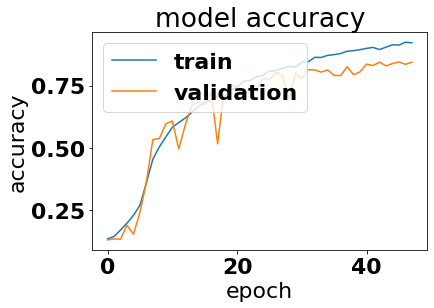

In [84]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Looking at the train/validation plots of accuracy over the training period we don't see signs of major over fitting either. I would say after 75% validation was achieved, some over fitting started to occur but results indicate only minor over fitting now.

In [85]:
model.evaluate(X_val,y_val)

52/52 [==============================] - 7s 131ms/step - loss: 1.1849 - accuracy: 0.6927


[1.1849467754364014, 0.6927239894866943]

In [86]:
y_test_pred_augmented2=model.predict(X_test)
y_test_pred_classes_augmented2 = np.argmax(y_test_pred_augmented2, axis=1)
y_test_pred_classes_augmented2 = to_categorical(np.array(y_test_pred_classes_augmented2))
y_test_pred_prob_augmented2 = np.max(y_test_pred_augmented2, axis=1)

In [87]:
# Test Accuracy 

accuracy_score(np.array(y_test), y_test_pred_classes_augmented2)

0.671578947368421

On the test set, our model achieved only 67% accuracy. This is much higher than 50%, and also tremendously better than randomly guessing 1 of 12 classes. This is very promising. We can look into where the model was making its mistakes in the confusion matrix.  

<AxesSubplot:>

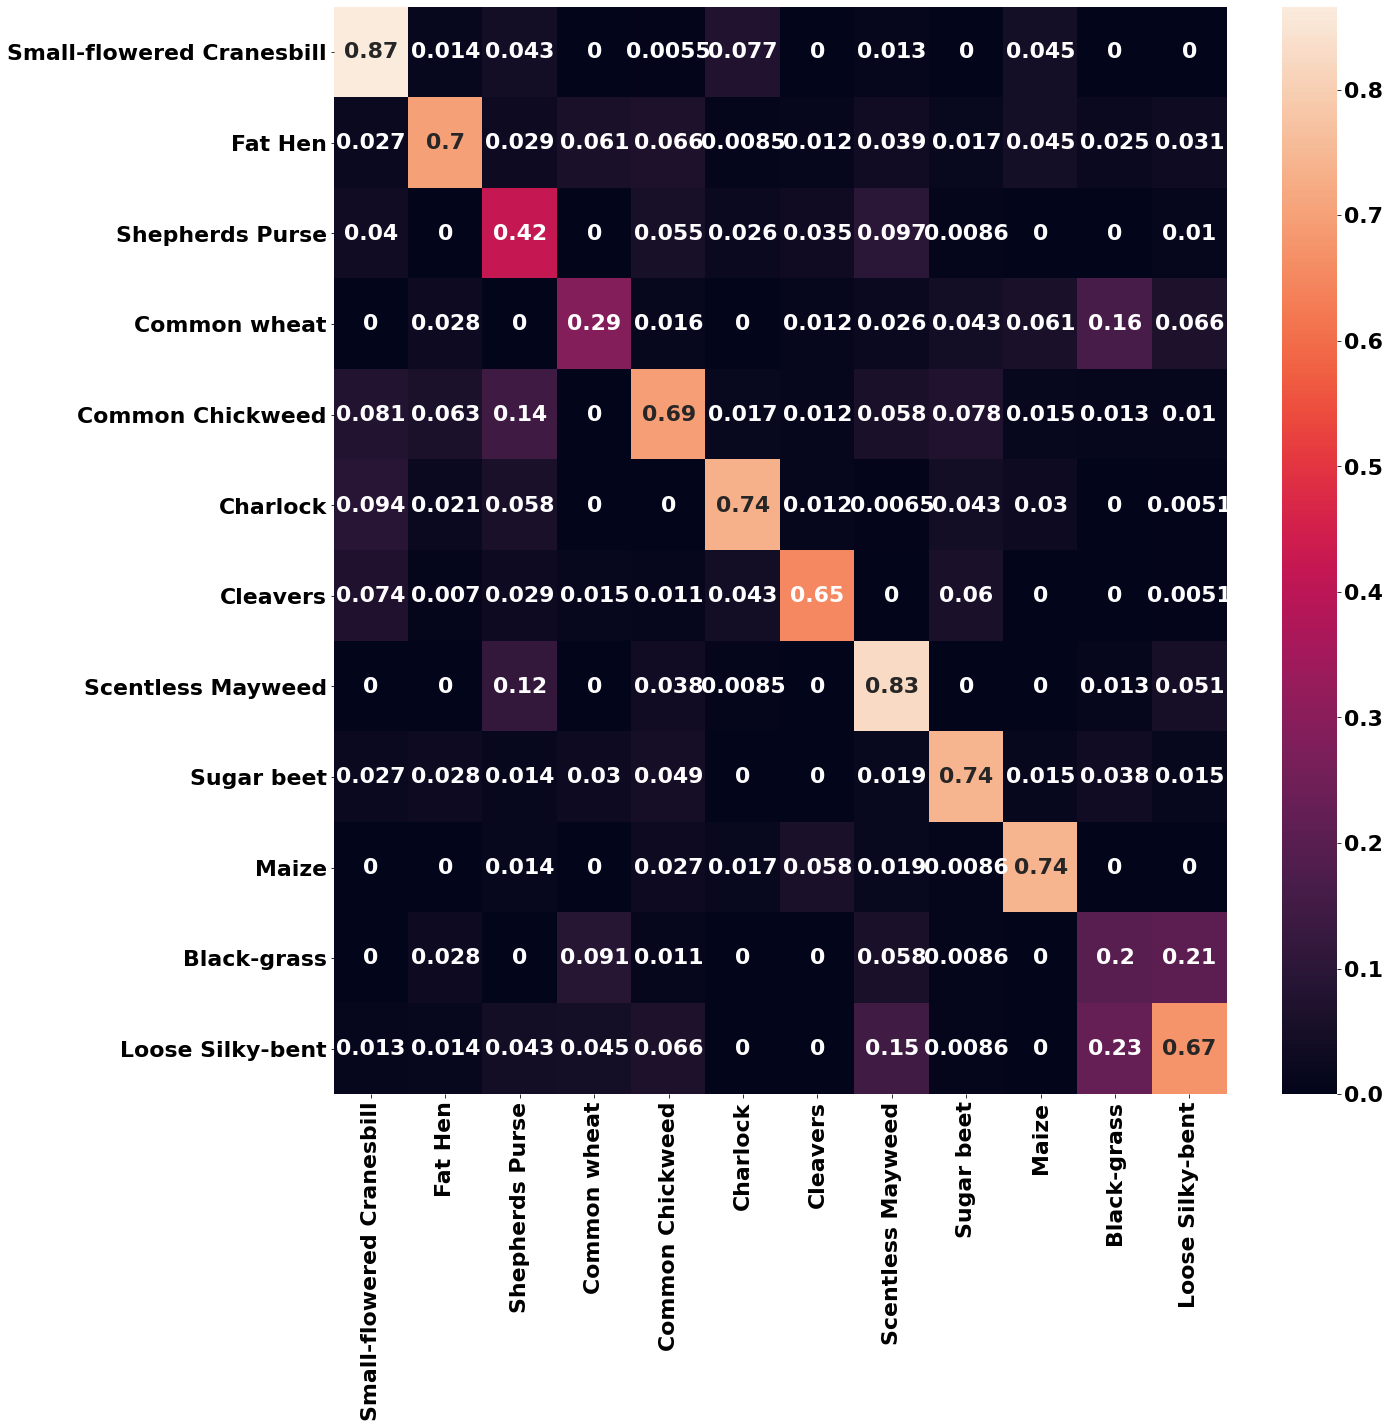

In [99]:
cf_matrix = confusion_matrix(np.array(y_test).argmax(axis=1), np.array(y_test_pred_classes_augmented2).argmax(axis=1))

# Confusion matrix normalized per category true value
cf_matrix_n1 = cf_matrix/np.sum(cf_matrix, axis=1)
plt.figure(figsize=(20,20))
sns.heatmap(cf_matrix_n1, xticklabels=CATEGORIES, yticklabels=CATEGORIES, annot=True)

The extra layer and increased number of filters in each layer made an incredible impact. The accuracy score of the model has actually doubled. When looking at the confusion matrix we see a prominent diagonal and black almost every else which is exactly what we want to see. Some areas of the confusion matrix do concern me however.

For instance, black grass and common wheat are only being correctly classified 20% and 29% of the time, respectively. Most other classes are performing really well. I suspect this is because of a lack of good training images for those specific categories. After all, I already discovered both of them were minority classes during my EDA.

I could go back and specifically create more of training points for just those two classes as one possible solution, but I do not have the computational power or the time to rerun this code on an even larger dataset. After all, there are so many other things to try for instance I would rather use my computational power to test a new solution type to this problem. I would like to consider transfer learning. 

In [100]:
print("=== Classification Report ===")
print(classification_report(y_test, y_test_pred_classes_augmented2))

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.71      0.87      0.78       149
           1       0.78      0.70      0.74       143
           2       0.46      0.42      0.44        69
           3       0.54      0.29      0.38        66
           4       0.67      0.69      0.68       183
           5       0.79      0.74      0.76       117
           6       0.82      0.65      0.73        86
           7       0.63      0.83      0.72       155
           8       0.73      0.74      0.74       116
           9       0.78      0.74      0.76        66
          10       0.30      0.20      0.24        79
          11       0.63      0.67      0.65       196

   micro avg       0.67      0.67      0.67      1425
   macro avg       0.65      0.63      0.63      1425
weighted avg       0.67      0.67      0.66      1425
 samples avg       0.67      0.67      0.67      1425



Class 10 and class 3 are not being categorized as well as the other classes.

# Transfer Learning

This is a major improvement. I think we can still do better. We can also try using transfer learning. I'm going to try to use the VGG16 model as a starting point. This model is designed for RGB images, but we can try to trick it by duplicating my single grayscale channel two times.

In [89]:
from keras.applications.vgg16 import VGG16

Now we are building a model using the concepts of **transfer learning**. We will be loading pre-built architecture **VGG16** which is trained on imagenet dataset. And then we will freeze the weights of first few initial layers and train only the last layers using our own data.


In [90]:
model = VGG16(include_top=False, weights='imagenet', input_shape = (128,128,3))
#include_top must be set to false in order to input_shape =  128x128
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0     

This is what the untouched VGG architecture looks like. I want to set the transfer layer at block 4 pooling layer

In [91]:
transfer_layer = model.get_layer('block4_pool')
vgg_model = Model(inputs=model.input, outputs=transfer_layer.output)

In [92]:
vgg_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0     

In [93]:
# we will choose which layers of VGG16 we actually want to fine-tune. Here we'll freeze all but the last convolutional layer
for layer in vgg_model.layers[0:13]:
    layer.trainable = False

In [94]:
for layer in vgg_model.layers:
    print(layer.name, layer.trainable)

input_1 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 True
block4_pool True


In [95]:
trans_model = Sequential()

# adding the convolutional part of the VGG16 model from above.
trans_model.add(vgg_model)
trans_model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu', input_shape = (128,128,1)))
trans_model.add(MaxPool2D(pool_size=(2,2)))
trans_model.add(Dropout(0.25))
# flattening the output of the VGG16 model because it is from a convolutional layer.
trans_model.add(Flatten())
#adding a dense layer with dropout

# adding a dense output layer.
trans_model.add(Dense(12, activation="softmax"))

In [96]:
trans_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model (Functional)           (None, 8, 8, 512)         7635264   
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 8, 8, 64)          294976    
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 12)                12300     
Total params: 7,942,540
Trainable params: 2,667,084
Non-trainable params: 5,275,456
____________________________________

In [97]:
# setting optimizer, loss function, and learning rate
optimizer = Adam(learning_rate=1e-4)
loss = "categorical_crossentropy"
metrics = ['accuracy']

trans_model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

* I further lowered the learning rate from 0.0003 to 0.0001 on the adam optimizer. 

Now that the model is compiled, I can modify our input so it is compatible. This will be done by duplicating the grayscale image pixels


In [101]:
print(X_train_2.shape)  # (64, 224, 224)
X_train_rgb = np.repeat(X_train_2[..., np.newaxis], 3, -2)
print(X_train_rgb.shape)  # (64, 224, 224, 3)
X_train_rgb = X_train_rgb.reshape(21606, 128, 128, 3)
print(X_train_rgb.shape)

(21606, 128, 128, 1)
(21606, 128, 128, 3, 1)
(21606, 128, 128, 3)


The input is now compatible with the VGG model input

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
mc = ModelCheckpoint('best_model_transfer', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

history = trans_model.fit(X_train_rgb, y_train_2, epochs=30, batch_size=128, 
                        validation_split=0.20, callbacks=[es, mc], use_multiprocessing=True)




Epoch 1/30
136/136 [==============================] - 511s 4s/step - loss: 2.3443 - accuracy: 0.2228 - val_loss: 1.9415 - val_accuracy: 0.3394

Epoch 00001: val_accuracy improved from -inf to 0.33943, saving model to best_model_transfer
INFO:tensorflow:Assets written to: best_model_transfer\assets
Epoch 2/30
136/136 [==============================] - 492s 4s/step - loss: 1.7968 - accuracy: 0.3815 - val_loss: 1.6477 - val_accuracy: 0.4433

Epoch 00002: val_accuracy improved from 0.33943 to 0.44331, saving model to best_model_transfer
INFO:tensorflow:Assets written to: best_model_transfer\assets
Epoch 3/30
136/136 [==============================] - 562s 4s/step - loss: 1.5080 - accuracy: 0.4836 - val_loss: 1.4658 - val_accuracy: 0.4940

Epoch 00003: val_accuracy improved from 0.44331 to 0.49398, saving model to best_model_transfer
INFO:tensorflow:Assets written to: best_model_transfer\assets
Epoch 4/30
136/136 [==============================] - 569s 4s/step - loss: 1.2912 - accuracy: 0.5

The vgg16 transfer learned model doesn't reach as high of a validation score as the CNN from scratch on the augmented data. It also takes tremendously longer to train because it must be fed a 3 channel array to perform computations.

In [1]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

NameError: name 'history' is not defined

In [ ]:
model.evaluate(X_val,y_val)

In [ ]:
y_test_pred_trans=model.predict(X_test)
y_test_pred_classes_trans = np.argmax(y_test_pred_trans, axis=1)
y_test_pred_classes_trans = to_categorical(np.array(y_test_pred_classes_trans))
y_test_pred_prob_trans = np.max(y_test_pred_trans, axis=1)

In [ ]:
accuracy_score(np.array(y_test), y_test_pred_classes_trans)

In [ ]:
cf_matrix = confusion_matrix(np.array(y_test).argmax(axis=1), np.array(y_test_pred_classes_trans).argmax(axis=1))

# Confusion matrix normalized per category true value
cf_matrix_n1 = cf_matrix/np.sum(cf_matrix, axis=1)
plt.figure(figsize=(8,6))
sns.heatmap(cf_matrix_n1, xticklabels=CATEGORIES, yticklabels=CATEGORIES, annot=True)

Due to a computer malfunction this is all of the code that was run with saved output. There is nothing I can do aside from re-running this entire notebook, which would take over 5 hours (im not sure if it would malfunction again unattended or not. I'm not sure what caused my computer to restart in the middle of a computation). I wish the output from the transfer learning model could be shown and the plots could be made, along with test set validation scores. But due to unforeseen circumstances the notebook must be left in its current state and submitted. I can only add markdown cells without comprimising the structure of the notebook. I will continue to conclude my notebook from this point forward and I hope that the integrity of the code written can stand alone without an output as I make my conclusions on the project:


don't forget: Visualize predictions for x_test[2], x_test[3], x_test[33], x_test[36], x_test[59].

# Conclusions

Without seeing the output from the transfer learning model test scores, it is hard to make a concrete conclusion.

However, by looking at the transfer learning training process that is still present in this notebook:

* Transfer learning @ epoch 17 : val_accuracy: 75% ; training accuracy: 92% we can conclude that the transfer learning model was in a state of overfitting. 

* Compare this to the Augmented CNN from scratch that was trained just before this model which reached 85% val_accuracy at 92% training accuracy 

I think it is clear that the best model in this notebook was already made and evaluated. The best model was the model in which the baseline model 1 was trained from scratch on the augmented set. I believe this score could have further been improved by focusing the image augmentation process on the classes which were predicted with injustice. In specific -  I would add additional augmented images to X_train_2 which belonged to the classes black grass and common wheat to improve that model. Beyond that I believe that the computers ability to classify plants with even 70% accuracy is effective. I also believe that a proof of concept for this notebook has been proved. The models in this notebook were not inparticular 'fine-tuned' by any means. I believe the scores in this notebook could be improved if additional time was alotted, but I also believe that time would be well spent, considering the provided proof of concept already present in this notebook. 

Best wishes.

-nedal.